# Investigation of apartment sale announcements

You have access to Yandex Real Estate data—an archive of ads for the sale of apartments in St. Petersburg and neighboring towns over the past few years. You need to learn how to determine the market value of real estate objects. Your task is to set the parameters. This will allow for the building of an automated system: it will track anomalies and fraudulent activity. 

For each apartment for sale, two types of data are available. The first is entered by the user, and the second is automatically obtained based on cartographic data. For example, the distance to the center, airport, nearest park, and body of water. 

### Contents:
1. Data retrieval from file.
2. Data preprocessing.
3. Feature engineering.
4. Exploratory data analysis.
    
    4.1. Let's study the following parameters: area, price, number of rooms, ceiling height. Let's build histograms for each parameter.

    4.2. Let's study the time of sale for apartments.

    4.3. Let's study the dependence of the price per square meter on the total area of the apartment, the number of rooms, the floor, the distance from the center.
  
    4.4. Let's study the dependence of the price per square meter on the date of placement.

    4.5. Let's select 10 settlements with the highest number of announcements.

5. Overall conclusion.

### Description of data:
- airports_nearest - distance to the nearest airport in meters (m)
- balcony - number of balconies
- ceiling_height - ceiling height in meters (m)
- cityCenters_nearest - distance to the city center in meters (m)
- days_exposition — how many days was the advertisement posted (from publication to removal)
- first_day_exposition — publication date
- floor — floor
- floors_total — total number of floors in the building
- is_apartment — apartments (boolean type)
- kitchen_area — kitchen area in squere meters (m²)
- last_price — the price at the time of removal from publication
- living_area — living area in square meters (m²)
- locality_name — name of the settlement
- open_plan — open plan (boolean type)
- parks_around3000 — number of parks within 3 km
- parks_nearest — distance to the nearest park (m)
- ponds_around3000 — number of ponds within 3 km
- ponds_nearest — distance to the nearest pond (m)
- rooms — number of rooms
- studio — boolean type indicating whether the apartment is a studio
- total_area — area of the apartment in square meters (m²)
- total_images — number of photos of the apartment in the listing

## 1. Data retrieval from file.

In [1]:
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import geopy as gp

pd.set_option('display.max_columns', 50) 

In [3]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv',sep='\t')
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


#### Conclusion:
According to the data review, a sufficient number of missing values have been identified.
- I propose to fill in the missing values in the ceiling_height column with the average values based on the distance of the settlement from the center of St. Petersburg, while for the missing values in St. Petersburg I propose to fill them in based on the grouping by the distance from the city;
- I suggest filling in the missing values in the floors_total column with the average values based on the distance of the settlement from the center of St. Petersburg;
- I suggest filling the missing values in the is_apartment column with either 0 or Boolean values based on the logic of the data;
- I suggest filling the missing values in the kitchen_area column with zero values for apartments that are studios, as the kitchen area in these apartments is nominal. It may be advisable to fill in the missing values in the living_area and kitchen_area columns with the mean and median values for this type of apartment;
- I suggest filling the gaps in the balcony column with zero values;
- I suggest filling in the missing values in the locality_name column based on the grouping by distance to the city center and to the airport;
- I suggest filling in the missing values in the airports_nearest and cityCenters_nearest columns with the average values based on the grouping by the name of the settlement and similar characteristics of the premises, as well as the values obtained by calculating the distances between the specified coordinates of the city center, the nearest airport, and the settlement where the apartment is located;
- I suggest filling the gaps in the columns parks_around3000, parks_nearest, ponds_around3000, and ponds_nearest with zero values;
- I suggest filling in the gaps in the "days_exposition" column with the difference between the current date and the date of publication.

Anomalies in the following columns have been preliminarily identified:
- total_area - premises with a total area of 900 m2;
- rooms - premises with a number of rooms from 0 to 100, a data error is possible;
- ceiling_height - premises with a ceiling height from 1 to 100 m, a data error is possible;
- floors_total - premises in buildings with a number of floors from 1 to 60, a data error is possible;
- floor - premises located on the 33rd floor, a data error is possible;
- airports_nearest - premises located 0 m from the airport, a data error is possible.

It is additionally advisable to convert the following columns to an integer type: last_price, floors_total, balcony, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition. 

It is advisable to round the data in the columns total_area, ceiling_height, living_area, kitchen_area to one decimal place.

## 2. Data preprocessing.

#### Filling in the blanks in the balcony column

In [5]:
df['balcony'] = df['balcony'].fillna(0)

#### Filling in the blanks in the столбце locality_name column

In [6]:
print('The number of missing values in the column locality_name:',
      df['locality_name'].isnull().sum()
      )

df[(df['locality_name'].isnull())][['locality_name', 'cityCenters_nearest','airports_nearest']].head()

The number of missing values in the column locality_name: 49


,locality_name,cityCenters_nearest,airports_nearest
1097,NaN,4258.0,23478.0
2033,NaN,NaN,NaN
2603,NaN,17369.0,22041.0
2632,NaN,17369.0,22041.0
3574,NaN,8127.0,27419.0


Let's create a summary table indicating the average, minimum, and maximum distance of the population from the city center to determine the boundaries of the settlements. Since the maximum boundary of St. Petersburg includes settlements, we will take the boundary of St. Petersburg as the minimum value of the distance to the city center for the settlement of Shushary.

In [7]:
pivot_centers_airports = df.pivot_table(index='locality_name',
                                        values=['cityCenters_nearest','airports_nearest'], 
                                        aggfunc=['mean','min','max']
                                        )

pivot_centers_airports.columns = ['mean_airports',
                                  'mean_city_center',
                                  'min_airports',
                                  'min_city_center',
                                  'max_airports',
                                  'max_city_center'
                                  ]

pivot_centers_airports_ed = pivot_centers_airports.reindex(columns=['mean_city_center', 
                                                                    'min_city_center', 
                                                                    'max_city_center',
                                                                    'mean_airports',
                                                                    'min_airports',
                                                                    'max_airports']
                                                           )

pivot_centers_airports_ed_df = pivot_centers_airports_ed.reset_index()

pivot_centers_airports_ed_df

,locality_name,mean_city_center,min_city_center,max_city_center,mean_airports,min_airports,max_airports
0,Зеленогорск,54617.583333,51115.0,62706.0,73300.250000,70016.0,81607.0
1,Колпино,32113.771513,29436.0,37477.0,26375.863501,23649.0,31691.0
2,Красное Село,30020.284091,27317.0,41792.0,26595.579545,23892.0,38367.0
3,Кронштадт,49195.726316,46657.0,51511.0,67469.263158,64931.0,69785.0
4,Ломоносов,50739.969697,36816.0,61495.0,48308.280303,46502.0,56896.0
5,Павловск,33206.921053,31533.0,36445.0,21053.342105,19380.0,24291.0
6,Петергоф,35468.925373,29815.0,49574.0,40184.676617,34626.0,46535.0
7,Пушкин,28745.375000,24311.0,35610.0,16447.869919,12157.0,21055.0
8,Санкт-Петербург,11601.291571,181.0,29493.0,28046.186237,0.0,54784.0
9,Сестрорецк,34624.480874,31130.0,42971.0,56640.486339,50031.0,61872.0


Let's add a tool to filter the pivot table by distance to the center and to the airport.

In [8]:
c_c = 23659
air = 20234
display(pivot_centers_airports_ed.query('(max_city_center > @c_c > min_city_center) and (max_airports > @air > min_airports)'))

,mean_city_center,min_city_center,max_city_center,mean_airports,min_airports,max_airports
locality_name,,,,,,
Санкт-Петербург,11601.291571,181.0,29493.0,28046.186237,0.0,54784.0
посёлок Шушары,24243.387615,17012.0,32079.0,16061.458716,9294.0,26293.0


Let's replace the missing values in locality_name with "Saint Petersburg" when the distance to the city center is less than 17012 m, and replace the other missing values with the closest match of distances according to the current data.

In [9]:
df.loc[(df['locality_name'].isnull()) & 
       (df['cityCenters_nearest'] < 17012), 'locality_name'
       ] = df.loc[(df['locality_name'].isnull()) & 
                  (df['cityCenters_nearest'] < 17012), 'locality_name'
                  ].fillna('Санкт-Петербург')

df.loc[(df['locality_name'].isnull()) & 
       (df['cityCenters_nearest'] < 17994), 'locality_name'
       ] = df.loc[(df['locality_name'].isnull()) & 
                  (df['cityCenters_nearest'] < 17994), 'locality_name'
                  ].fillna('посёлок Шушары')

df.loc[(df['locality_name'].isnull()) & 
       ((df['cityCenters_nearest'] > 23658) & 
        (df['cityCenters_nearest'] < 23660)), 'locality_name'
        ] = df.loc[(df['locality_name'].isnull()) & 
                   ((df['cityCenters_nearest'] > 23658) & 
                    (df['cityCenters_nearest'] < 23660)), 'locality_name'
                    ].fillna('посёлок Шушары')

df.loc[(df['locality_name'].isnull()) & 
       ((df['cityCenters_nearest'] > 31812) & 
        (df['cityCenters_nearest'] < 31898)), 'locality_name'
        ] = df.loc[((df['locality_name'].isnull()) & 
                    (df['cityCenters_nearest'] > 31812) & 
                    (df['cityCenters_nearest'] < 31898)), 'locality_name'
                    ].fillna('Павловск')

df.loc[(df['locality_name'].isnull()) & 
       ((df['cityCenters_nearest'] > 41293) & 
        (df['cityCenters_nearest'] < 41295)), 'locality_name'
        ] = df.loc[((df['locality_name'].isnull()) & 
                    (df['cityCenters_nearest'] > 41293) & 
                    (df['cityCenters_nearest'] < 41295)), 'locality_name'
                    ].fillna('Сестрорецк')

Of the 49 missing entries in the locality_name column, there are 8 that we cannot fill as there is no information at all in the locality_name, cityCenters_nearest, and airports_nearest columns.

Let's delete the positions.

In [10]:
df = df.dropna(subset=['locality_name']).reset_index()

In [11]:
print('The number of missing values in the column locality_name:',
      df['locality_name'].isnull().sum()
      )

The number of missing values in the column locality_name: 0


#### Filling in the blanks in the cityCenters_nearest and airports_nearest columns:

In [12]:
print('The number of missing values in the column cityCenters_nearest:',
      df['cityCenters_nearest'].isnull().sum()
      )
print('The number of missing values simultaneously in the cityCenters_nearest and airports_nearest columns:',
      len(df[(df['cityCenters_nearest'].isnull()) & (df['airports_nearest'].isnull())])
      )

The number of missing values in the column cityCenters_nearest: 5511
The number of missing values simultaneously in the cityCenters_nearest and airports_nearest columns: 5510


Let's form dictionaries of populated places with the average distance to the center of St. Petersburg and to the airport to fill in the gaps.

In [13]:
centers_dict = pd.Series(pivot_centers_airports_ed_df['mean_city_center'].values, 
                         index=pivot_centers_airports_ed_df['locality_name'].values)
airports_dict = pd.Series(pivot_centers_airports_ed_df['mean_airports'].values, 
                          index=pivot_centers_airports_ed_df['locality_name'].values)

Let's replace the missing values with the average values according to the previously compiled lists.

In [14]:
df.loc[df['cityCenters_nearest'].isna(),'cityCenters_nearest'] = df.loc[df['cityCenters_nearest'].isna(), 
                                                                        'locality_name'
                                                                        ].map(centers_dict)
df.loc[df['airports_nearest'].isna(),'airports_nearest'] = df.loc[df['airports_nearest'].isna(), 
                                                                  'locality_name'
                                                                  ].map(airports_dict)

In [15]:
print('The number of missing values in the column cityCenters_nearest:',
      df['cityCenters_nearest'].isnull().sum()
      )
print('The number of missing values simultaneously in the cityCenters_nearest and airports_nearest columns:',
      len(df[(df['cityCenters_nearest'].isnull()) & (df['airports_nearest'].isnull())])
      )

The number of missing values in the column cityCenters_nearest: 5386
The number of missing values simultaneously in the cityCenters_nearest and airports_nearest columns: 5386


The number of missing values in the airports_nearest and cityCenters_nearest columns has decreased. 

The remaining empty positions in the airports_nearest and cityCenters_nearest columns can be filled having the coordinates of the settlements, the nearest airport and the center of St. Petersburg. With the coordinates, it is possible to calculate the distance and fill in the gaps. 

The absence of these characteristics indicates that these parameters are calculated and are based on the location of a particular building, the city center and the airport, but within a certain radius. Most likely, neither the city center nor the airport fell into this radius, and the system did not enter any information.

To fill in the blanks in airports_nearest and cityCenters_nearest, we will get the coordinates of the settlements and the coordinates of the center of St. Petersburg and the nearest airport through geocoding. Then we will calculate the distance between the coordinates and fill in the blanks with the resulting data. 

We will list the unique names of settlements without the distance to the center of St. Petersburg and the nearest airport, and add the name of the region to them in order to exclude the coordinates outside the Leningrad region.

In [16]:
list_of_cities_NaN_airport_center = df.query('airports_nearest != airports_nearest and cityCenters_nearest != cityCenters_nearest')['locality_name'].unique()
cities_location = pd.DataFrame({'name':list_of_cities_NaN_airport_center}) + ', Ленинградская область, Россия'
cities_location.head()

,name
0,"городской посёлок Янино-1, Ленинградская облас..."
1,"посёлок Мурино, Ленинградская область, Россия"
2,"Сертолово, Ленинградская область, Россия"
3,"деревня Кудрово, Ленинградская область, Россия"
4,"Коммунар, Ленинградская область, Россия"


To fill in the missing data, we will use the Geopy geocoding library.

Let's get the coordinates of the center of St. Petersburg and the nearest airport (Pulkovo).

Geocoder Yandex

In [17]:
from geopy import Yandex
geolocator = Yandex(api_key='fbf9dfa1-7f4a-4975-b29f-35d644a3c740')
locations_spb = geolocator.geocode('Санкт-Петербург')
coordination_spb = ((locations_spb.latitude, locations_spb.longitude))
location_air = geolocator.geocode('Аэропорт Пулково')
coordination_air = ((location_air.latitude, location_air.longitude))

In [18]:
print('Coordinates of the St. Petersburg', coordination_spb)
print('Coordinates of the airport Pulkovo', coordination_air)

Coordinates of the St. Petersburg (59.938955, 30.315644)
Coordinates of the airport Pulkovo (59.799774, 30.273036)


Let's get the coordinates of the settlements from the list previously formed.

Geocoder Yandex

In [19]:
#from geopy.geocoders import Yandex
#geolocator = Yandex(api_key='fbf9dfa1-7f4a-4975-b29f-35d644a3c740')
#cities_location_csv['location'] = cities_location_csv['name'].apply(geolocator.geocode).apply(lambda loc: tuple((loc.latitude, loc.longitude)) if loc else None)
#cities_location_csv

Due to the instability of geopy and the Yandex geocoder, as well as the limited number of daily requests, we will make a request for coordinates with subsequent saving of the data to a separate file.

In [20]:
url_2 = 'https://drive.google.com/file/d/1EwxGZjyxyUBK3s2XrgUJpnTex2bhmCZy/view?usp=sharing'
file_id=url_2.split('/')[-2]
dwn_url='https://drive.google.com/uc?id=' + file_id

cities_location_csv = pd.read_csv(dwn_url) #, sep='\t'
cities_location_csv.head()
cities_location_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               336 non-null    object 
 1   latitude           336 non-null    float64
 2   longitude          336 non-null    float64
 3   coordinates        336 non-null    object 
 4   tuple_coordinates  336 non-null    object 
dtypes: float64(2), object(3)
memory usage: 13.2+ KB


In [21]:
cities_location_csv['location'] = tuple(zip(cities_location_csv['latitude'], cities_location_csv['longitude']))

In [22]:
cities_location_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               336 non-null    object 
 1   latitude           336 non-null    float64
 2   longitude          336 non-null    float64
 3   coordinates        336 non-null    object 
 4   tuple_coordinates  336 non-null    object 
 5   location           336 non-null    object 
dtypes: float64(2), object(4)
memory usage: 15.9+ KB


Let's check if there are any missing.

In [23]:
cities_location_csv.isna().sum()

name                 0
latitude             0
longitude            0
coordinates          0
tuple_coordinates    0
location             0
dtype: int64

Let's calculate the distance between the coordinates of populated places and the center of St. Petersburg and the nearest airport using the capabilities of the geopy library.

In [24]:
from geopy.distance import geodesic

cities_location_csv['cityCenters_nearest'] = cities_location_csv['location'].apply(lambda x: geodesic(x, coordination_spb).m)#.astype(int)
cities_location_csv['airports_nearest'] = cities_location_csv['location'].apply(lambda x: geodesic(x, coordination_air).m)#.astype(int)
cities_location_csv.head()

,name,latitude,longitude,coordinates,tuple_coordinates,location,cityCenters_nearest,airports_nearest
0,городской посёлок Янино-1,59.948140,30.560524,"59.94814, 30.560524","(59.94814, 30.560524)","(59.94814, 30.560524)",13725.768693,23076.445597
1,посёлок Мурино,60.051284,30.438578,"60.051284, 30.438578","(60.051284, 30.438578)","(60.051284, 30.438578)",14272.006787,29510.755964
2,Сертолово,60.143531,30.217179,"60.143531, 30.217179","(60.143531, 30.217179)","(60.143531, 30.217179)",23443.697828,38425.417465
3,деревня Кудрово,59.908489,30.513578,"59.908489, 30.513578","(59.908489, 30.513578)","(59.908489, 30.513578)",11578.800863,18122.993456
4,Коммунар,59.621609,30.393483,"59.621609, 30.393483","(59.621609, 30.393483)","(59.621609, 30.393483)",35624.366384,20974.752468


We will form dictionaries for subsequent filling of gaps in distance.

In [25]:
cityCenters_nearest_dict = pd.Series(cities_location_csv['cityCenters_nearest'].values, 
                                     index=cities_location_csv['name'].values
                                     )

airports_nearest_dict = pd.Series(cities_location_csv['airports_nearest'].values, 
                                  index=cities_location_csv['name'].values
                                  )

Let's fill in the blanks in the data.

In [26]:
df.loc[df['cityCenters_nearest'].isna(), 
       'cityCenters_nearest'] = df.loc[df['cityCenters_nearest'].isna(), 
                                       'locality_name'
                                       ].map(cityCenters_nearest_dict)

df.loc[df['airports_nearest'].isna(), 
       'airports_nearest'] = df.loc[df['airports_nearest'].isna(), 
                                    'locality_name'
                                    ].map(airports_nearest_dict)
df.reset_index()

,level_0,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,0.0,Санкт-Петербург,18863.000000,16028.000000,1.0,482.0,2.0,755.0,NaN
1,1,1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.000000,18603.000000,0.0,NaN,0.0,NaN,81.0
2,2,2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.000000,13933.000000,1.0,90.0,2.0,574.0,558.0
3,3,3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.000000,6800.000000,2.0,84.0,3.0,234.0,424.0
4,4,4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,0.0,Санкт-Петербург,31856.000000,8098.000000,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23686,23686,23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,0.0,Санкт-Петербург,24665.000000,4232.000000,1.0,796.0,3.0,381.0,NaN
23687,23687,23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,0.0,Тосно,44505.514823,54344.688190,NaN,NaN,NaN,NaN,45.0
23688,23688,23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,0.0,село Рождествено,56095.849048,71580.060693,NaN,NaN,NaN,NaN,NaN
23689,23689,23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.000000,10364.000000,2.0,173.0,3.0,196.0,602.0


Let's check the number of absences.

In [27]:
print('The number of missing values in the column airports_nearest:', 
      df['airports_nearest'].isna().sum()
      )
print('The number of missing values in the column cityCenters_nearest:', 
      df['cityCenters_nearest'].isna().sum()
      )

The number of missing values in the column airports_nearest: 0
The number of missing values in the column cityCenters_nearest: 0


#### Replace the missing values in the column ceiling_height:

We should categorize the positions based on the distance to the city center into the following groups: premises within a radius of up to 6 km - the central part of the city, from 6 to 17 km - residential areas, from 17 km and more - the region.

In [28]:
print('The number of missing values in the column ceiling_height:', 
      df['ceiling_height'].isna().sum()
      )

The number of missing values in the column ceiling_height: 9189


In [29]:
def fillna_ceiling_height(row):
    if row['cityCenters_nearest'] < 6000 and row['locality_name'] == 'Санкт-Петербург':
        return 'Центральная часть города'
    elif row['cityCenters_nearest'] < 17012 and row['locality_name'] == 'Санкт-Петербург':
        return 'Спальный район'
    elif row['cityCenters_nearest'] < 17012 and row['locality_name'] != 'Санкт-Петербург':
        return 'Спальный район'    
    elif row['cityCenters_nearest'] >= 17012 and row['locality_name'] == 'Санкт-Петербург':
        return 'Спальный район'  
    elif row['cityCenters_nearest'] >= 17012 and row['locality_name'] != 'Санкт-Петербург':
        return 'Ленинградская область'

In [30]:
df['fromcenter_category'] = df.apply(fillna_ceiling_height, axis=1)

In [31]:
print('The number of missing values in the column fromcenter_category:', 
      df['fromcenter_category'].isna().sum()
      )

The number of missing values in the column fromcenter_category: 0


The average ceiling height based on the grouping by distance from the city center.

In [32]:
ceiling_height_cat = pd.DataFrame(df.groupby('fromcenter_category')['ceiling_height'].mean().sort_values(ascending=False).to_frame()).reset_index().round(2)
ceiling_height_dict = pd.Series(ceiling_height_cat['ceiling_height'].values, 
                                index=ceiling_height_cat['fromcenter_category'].values
                                )
ceiling_height_dict

Центральная часть города    3.16
Спальный район              2.73
Ленинградская область       2.68
dtype: float64

Центральная часть города - the central part of the city.

Спальный район - a residential area.

Ленинградская область - the Leningrad Region.

Let's replace the missing data with the average ceiling heights based on the grouping by distance from the city center.

In [33]:
df.loc[df['ceiling_height'].isna(), 
       'ceiling_height'] = df.loc[df['ceiling_height'].isna(), 
                                  'fromcenter_category'
                                  ].map(ceiling_height_dict)

Let's check the number of absences.

In [34]:
print('The number of missing values in the column ceiling_height:', 
      df['ceiling_height'].isna().sum()
      )

The number of missing values in the column ceiling_height: 0


#### Replace missing values in the "floors_total" column:

In [35]:
print('The number of missing values in the column floors_total:', 
      df['floors_total'].isna().sum()
      )

The number of missing values in the column floors_total: 86


The average number of floors based on the grouping by distance from the city center.

In [36]:
floors_total_cat = df.groupby('fromcenter_category')['floors_total'].mean().sort_values(ascending=False).to_frame().astype(int).reset_index()
floors_total_dict = pd.Series(floors_total_cat['floors_total'].values, 
                              index=floors_total_cat['fromcenter_category'].values
                              )
floors_total_dict

Спальный район              12
Ленинградская область        7
Центральная часть города     6
dtype: int64

Let's replace the missing data with the average floor count per category.

In [37]:
df.loc[df['floors_total'].isna(), 
       'floors_total'] = df.loc[df['floors_total'].isna(), 
                                'fromcenter_category'
                                ].map(floors_total_dict)

Let's check the number of absences.

In [38]:
print('The number of missing values in the column floors_total:', 
      df['floors_total'].isna().sum()
      )

The number of missing values in the column floors_total: 0


#### Замена пропусков в столбце living_area и kitchen_area:

In [39]:
print('The number of missing values in the column living_area:', 
      df['living_area'].isna().sum()
      )
print('The number of missing values in the column kitchen_area:', 
      df['kitchen_area'].isna().sum()
      )
print('The number of missing values simultaneously for living_area and kitchen_area:',
      len(df[(df['living_area'].isnull()) & (df['kitchen_area'].isnull())])
      )

The number of missing values in the column living_area: 1902
The number of missing values in the column kitchen_area: 2276
The number of missing values simultaneously for living_area and kitchen_area: 1463


Let's build a scatter plot of the relationship between average residential area and total area.

0.9395572266689797


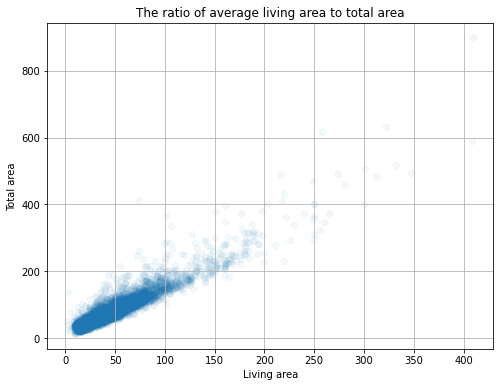

In [40]:
print(df['living_area'].corr(df['total_area']))
x = df['living_area']
y = df['total_area']
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.05)
plt.title('The ratio of average living area to total area')
plt.ylabel('Total area')
plt.xlabel('Living area')
plt.grid(True)
plt.show()

From the scatterplot and the correlation coefficient, a linear relationship between living area and total area can be observed. Missing living area values will be replaced with the ratio of the average living area to the living area per row.

In [41]:
mean_living_area = (df['living_area'] / df['total_area']).mean()
df['living_area'] = df['living_area'].fillna(round((df['total_area'] *mean_living_area), 1))

print('The number of missing values in the column living_area:', 
      df['living_area'].isna().sum()
      )

The number of missing values in the column living_area: 0


You cannot fill in the missing kitchen area values by subtracting living area from total area, as there may be other common areas in the apartment, whose area may be either included in total area or be a separate parameter which is not present in the given dataframe. To clarify the possibility of replacing the missing values, let's create a scatter plot of the ratio of average kitchen area to total area.

0.6092528395401601


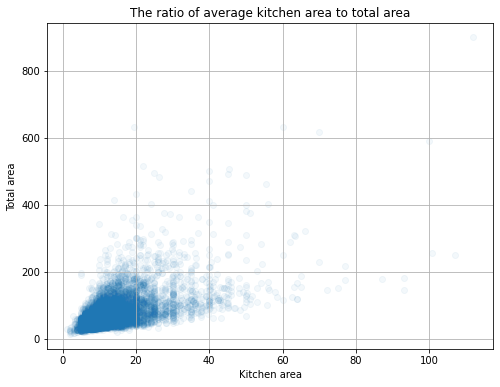

In [42]:
print(df['kitchen_area'].corr(df['total_area']))
x = df['kitchen_area']
y = df['total_area']
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.05)
plt.title('The ratio of average kitchen area to total area')
plt.ylabel('Total area')
plt.xlabel('Kitchen area')
plt.grid(True)
plt.show()

From the scatterplot and the correlation coefficient, a linear relationship between living area and kitchen area can be observed. Missing kitchen area values will be replaced with the ratio of average kitchen area to living area per row.

In [43]:
mean_kitchen_area = (df['kitchen_area'] / df['total_area']).mean()
df['kitchen_area'] = df['kitchen_area'].fillna(round((df['total_area'] *mean_kitchen_area), 1))

print('The number of missing values in the column kitchen_area:', 
      df['kitchen_area'].isna().sum()
      )

print('The number of missing values simultaneously for living_area and kitchen_area:',
      len(df[(df['living_area'].isnull()) & 
             (df['kitchen_area'].isnull())])
      )

The number of missing values in the column kitchen_area: 0
The number of missing values simultaneously for living_area and kitchen_area: 0


In studio apartments there is no separate kitchen area and it is part of the living area. Let's replace the kitchen area values in studio apartments with zeros.

In [44]:
df.loc[df['studio'] == True, 'kitchen_area'] = 0
df.loc[df['studio'] == True].head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fromcenter_category
144,144,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.73,24.0,15.50,2,NaN,True,False,0.0,2.0,посёлок Мурино,29510.755964,14272.006787,NaN,NaN,NaN,NaN,181.0,Спальный район
440,440,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.73,17.0,24.75,4,NaN,True,False,0.0,2.0,Санкт-Петербург,38171.000000,15015.000000,0.0,NaN,2.0,982.0,64.0,Спальный район
608,608,2,1850000.0,25.00,2019-02-20T00:00:00,0,2.68,10.0,14.10,7,NaN,True,False,0.0,0.0,посёлок Шушары,16061.458716,24243.387615,NaN,NaN,NaN,NaN,29.0,Ленинградская область
697,697,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,NaN,True,False,0.0,0.0,деревня Кудрово,18122.993456,11578.800863,NaN,NaN,NaN,NaN,201.0,Спальный район
716,716,5,1500000.0,17.00,2017-06-07T00:00:00,0,2.70,9.0,12.00,1,NaN,True,False,0.0,0.0,посёлок Шушары,18654.000000,29846.000000,0.0,NaN,0.0,NaN,40.0,Ленинградская область


Let's check the data for input errors of the area, if there are any apartments where the sum of the living area and kitchen is greater than the total.

In [45]:
df.query('total_area < (living_area + kitchen_area)').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 184 to 23194
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 108 non-null    int64  
 1   total_images          108 non-null    int64  
 2   last_price            108 non-null    float64
 3   total_area            108 non-null    float64
 4   first_day_exposition  108 non-null    object 
 5   rooms                 108 non-null    int64  
 6   ceiling_height        108 non-null    float64
 7   floors_total          108 non-null    float64
 8   living_area           108 non-null    float64
 9   floor                 108 non-null    int64  
 10  is_apartment          24 non-null     object 
 11  studio                108 non-null    bool   
 12  open_plan             108 non-null    bool   
 13  kitchen_area          108 non-null    float64
 14  balcony               108 non-null    float64
 15  locality_name      

Identified rows with data entry errors will be removed from the dataframe.

In [46]:
df = df.query('total_area > (living_area + kitchen_area)')

#### Replace the missing values in days_exposition:

In [47]:
print('The number of missing values in the column days_exposition:', 
      df['days_exposition'].isna().sum()
      )

The number of missing values in the column days_exposition: 3156


The missing data in the days_exposition column is most likely due to the fact that the objects are still for sale and this parameter is calculated. We will fill in the missing data with the difference in days from the current date and the publication date (first_day_exposition).

In [48]:
from datetime import datetime as date
today = pd.to_datetime(date.now(), format='%Y-%m-%dT%H:%M:%S')

In [49]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
df.loc[df['days_exposition'].isna(),'days_exposition'] = (today - df['first_day_exposition']).dt.days
df.head()

<ipython-input-49-d20db9a865e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fromcenter_category
0,0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,1448.0,Спальный район
1,1,7,3350000.0,40.4,2018-12-04,1,2.68,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Ленинградская область
2,2,10,5196000.0,56.0,2015-08-20,2,2.73,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Спальный район
3,3,0,64900000.0,159.0,2015-07-24,3,2.73,14.0,89.8,9,NaN,False,False,29.8,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Спальный район
4,4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Спальный район


In [50]:
print('The number of missing values in the column days_exposition:', 
      df['days_exposition'].isna().sum()
      )

The number of missing values in the column days_exposition: 0


Let's check the data for any missing values.

#### After filling in the missing values, let's check and possibly correct any errors and artifacts in the data:

In [51]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23511 entries, 0 to 23690
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 23511 non-null  int64         
 1   total_images          23511 non-null  int64         
 2   last_price            23511 non-null  float64       
 3   total_area            23511 non-null  float64       
 4   first_day_exposition  23511 non-null  datetime64[ns]
 5   rooms                 23511 non-null  int64         
 6   ceiling_height        23511 non-null  float64       
 7   floors_total          23511 non-null  float64       
 8   living_area           23511 non-null  float64       
 9   floor                 23511 non-null  int64         
 10  is_apartment          2737 non-null   object        
 11  studio                23511 non-null  bool          
 12  open_plan             23511 non-null  bool          
 13  kitchen_area    

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23511.000000,23511.000000,2.351100e+04,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,18063.000000,8021.000000,18063.000000,9055.000000,23511.000000
mean,11847.039471,9.860746,6.538550e+06,60.395807,2.072264,2.760970,10.669984,34.497044,5.889201,10.510525,0.589469,35255.877280,23340.992847,0.610419,491.228151,0.769806,517.873882,372.876356
std,6842.072011,5.676146,1.087176e+07,35.685717,1.077914,0.731298,6.578177,22.274996,4.879633,6.093114,0.957576,27687.862514,29588.712678,0.801308,342.061535,0.937442,277.700004,539.846011
min,0.000000,0.000000,1.219000e+04,13.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,5919.500000,6.000000,3.429500e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,19850.500000,10917.000000,0.000000,288.000000,0.000000,293.500000,45.000000
50%,11848.000000,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,29510.755964,14272.006787,0.000000,455.000000,1.000000,502.000000,125.000000
75%,17772.500000,14.000000,6.800000e+06,70.000000,3.000000,2.750000,16.000000,42.000000,8.000000,12.000000,1.000000,39898.000000,21469.480372,1.000000,612.000000,1.000000,729.000000,390.000000
max,23698.000000,50.000000,7.630000e+08,900.000000,19.000000,32.000000,60.000000,409.700000,33.000000,112.000000,5.000000,317110.245960,308116.986030,3.000000,3190.000000,3.000000,1344.000000,3009.000000


Let's check the "total_area" column for a maximum value of 900 m2.

In [52]:
df[df['total_area'] == 900]

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fromcenter_category
19537,19540,8,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,NaN,False,False,112.0,0.0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0,Спальный район


As we can see, this is not a mistake, but a quite real object located on the top floor.

Let's check for zero values in the rooms column.

In [53]:
df[df['rooms'] == 0].head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fromcenter_category
144,144,1,2450000.0,27.00,2017-03-30,0,2.73,24.0,15.50,2,NaN,True,False,0.0,2.0,посёлок Мурино,29510.755964,14272.006787,NaN,NaN,NaN,NaN,181.0,Спальный район
349,349,4,2320000.0,25.00,2017-09-27,0,2.73,14.0,17.00,1,NaN,False,True,4.7,0.0,деревня Кудрово,18122.993456,11578.800863,NaN,NaN,NaN,NaN,45.0,Спальный район
440,440,8,2480000.0,27.11,2018-03-12,0,2.73,17.0,24.75,4,NaN,True,False,0.0,2.0,Санкт-Петербург,38171.000000,15015.000000,0.0,NaN,2.0,982.0,64.0,Спальный район
508,508,0,3375000.0,34.40,2017-03-28,0,2.68,26.0,24.30,19,NaN,False,True,6.4,1.0,посёлок Парголово,53115.000000,19292.000000,0.0,NaN,1.0,593.0,430.0,Ленинградская область
608,608,2,1850000.0,25.00,2019-02-20,0,2.68,10.0,14.10,7,NaN,True,False,0.0,0.0,посёлок Шушары,16061.458716,24243.387615,NaN,NaN,NaN,NaN,29.0,Ленинградская область


Let's additionally check if all objects with zero values in the 'rooms' column are studios.

In [54]:
df[(df['rooms'] == 0) & (df['studio'] == False)].head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fromcenter_category
349,349,4,2320000.0,25.0,2017-09-27,0,2.73,14.0,17.0,1,NaN,False,True,4.7,0.0,деревня Кудрово,18122.993456,11578.800863,NaN,NaN,NaN,NaN,45.0,Спальный район
508,508,0,3375000.0,34.4,2017-03-28,0,2.68,26.0,24.3,19,NaN,False,True,6.4,1.0,посёлок Парголово,53115.000000,19292.000000,0.0,NaN,1.0,593.0,430.0,Ленинградская область
780,780,9,2600000.0,26.1,2018-02-20,0,2.73,18.0,14.7,8,NaN,False,True,4.9,1.0,посёлок Мурино,29510.755964,14272.006787,NaN,NaN,NaN,NaN,45.0,Спальный район
839,839,14,1900000.0,35.0,2017-04-14,0,2.70,5.0,15.0,3,False,False,True,6.6,1.0,поселок Новый Свет,27242.135360,42930.786373,NaN,NaN,NaN,NaN,7.0,Ленинградская область
946,946,5,2200000.0,23.0,2016-09-27,0,2.73,27.0,18.0,7,NaN,False,True,4.3,2.0,посёлок Мурино,29510.755964,14272.006787,NaN,NaN,NaN,NaN,483.0,Спальный район


Replace the zero values in the "room" column with "True" from "False" in the "studio" column.

In [55]:
df.loc[df['rooms'] == 0, 'studio'] = True

Let's check for anomalous values in the ceiling_height column.

In modern and new houses, apartments with ceiling heights up to 10 meters are offered for sale, but the total area of these apartments starts from 120 m2. According to current data, we see both studios and multi-room apartments with an area of up to 100 m2. In my opinion, these are data with input errors when registering an apartment. 

Let's replace the data in the ceiling_height column with the average values based on the distance of the object from the city center.

In [56]:
df.query('6 < ceiling_height')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fromcenter_category
355,355,17,3600000.0,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,False,False,10.3,2.0,Гатчина,27127.695398,42679.991809,NaN,NaN,NaN,NaN,259.0,Ленинградская область
3147,3148,14,2900000.0,75.0,2018-11-12,3,32.0,3.0,53.0,2,NaN,False,False,8.0,0.0,Волхов,117103.010743,114017.671487,NaN,NaN,NaN,NaN,1563.0,Ленинградская область
3473,3474,3,1400000.0,30.0,2018-03-16,1,8.0,5.0,15.3,2,False,False,False,7.3,0.0,деревня Нурма,49424.044235,57525.537389,NaN,NaN,NaN,NaN,125.0,Ленинградская область
4642,4643,0,4300000.0,45.0,2018-02-01,2,25.0,9.0,30.0,2,NaN,False,False,7.0,1.0,Санкт-Петербург,12016.000000,13256.000000,1.0,658.0,1.0,331.0,181.0,Спальный район
4875,4876,7,3000000.0,25.0,2017-09-27,0,27.0,25.0,17.0,17,NaN,True,True,4.7,2.0,посёлок Мурино,29510.755964,14272.006787,NaN,NaN,NaN,NaN,28.0,Спальный район
5075,5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,False,False,5.5,0.0,Санкт-Петербург,29686.000000,8389.000000,3.0,397.0,1.0,578.0,7.0,Спальный район
5245,5246,0,2500000.0,54.0,2017-10-13,2,27.0,5.0,30.0,3,NaN,False,False,9.0,2.0,деревня Мины,42640.652506,57748.969399,NaN,NaN,NaN,NaN,540.0,Ленинградская область
5668,5669,4,4400000.0,50.0,2017-08-08,2,26.0,9.0,21.3,3,NaN,False,False,7.0,2.0,Санкт-Петербург,28981.000000,10912.000000,1.0,305.0,0.0,NaN,267.0,Спальный район
5806,5807,17,8150000.0,80.0,2019-01-09,2,27.0,36.0,41.0,13,NaN,False,False,12.0,5.0,Санкт-Петербург,18732.000000,20444.000000,0.0,NaN,3.0,80.0,38.0,Спальный район
5862,5863,20,5650000.0,45.0,2018-08-15,1,8.3,16.0,19.3,14,NaN,False,False,8.3,1.0,Санкт-Петербург,13069.000000,10763.000000,0.0,NaN,1.0,613.0,14.0,Спальный район


In [57]:
df.loc[df['ceiling_height'] > 6, 'ceiling_height'] = df.loc[df['ceiling_height'] > 6, 
                                                            'fromcenter_category'
                                                            ].map(ceiling_height_dict)
df.query('6 < ceiling_height')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fromcenter_category


In the dataframe, there are objects with ceiling heights below the SNiP 2.5 m. In my opinion, these are data entry errors when registering the object. At the same time, understanding that a large variety of houses is represented in the sample, we will replace the obviously erroneous data, below 2.4 m (2.5 - 5%) with the average heights according to the distance of the apartment from the city center.

In [58]:
df.query('2.5 >= ceiling_height')
df.loc[df['ceiling_height'] < 2.5, 'ceiling_height'] = df.loc[df['ceiling_height'] > 6, 
                                                              'fromcenter_category'
                                                              ].map(ceiling_height_dict)

Let's check for anomalous values in the floors_total column.

In [59]:
df.query('37 < floors_total')

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fromcenter_category
2252,2253,12,3800000.0,45.5,2018-06-28,2,2.88,60.0,27.4,4,NaN,False,False,7.4,0.0,Кронштадт,67763.0,49488.0,2.0,342.0,3.0,614.0,166.0,Ленинградская область
16729,16731,9,3978000.0,40.0,2018-09-24,1,2.65,52.0,10.5,18,NaN,False,False,14.0,0.0,Санкт-Петербург,20728.0,12978.0,1.0,793.0,0.0,NaN,45.0,Спальный район


There are two anomalous values in the number of floors of buildings (60 and 52 floors). In my opinion, an apartment located in Kronstadt in a building with 60 floors is not realistic; most likely it is an input error and not 60, but 6. The second outlier in St. Petersburg in 2022 is the highest residential building, which includes 37 floors; most likely it is an input error and not 52, but 25.

In [60]:
df.loc[df['floors_total'] == 60, 'floors_total'] = 6
df.loc[df['floors_total'] == 52, 'floors_total'] = 25

Let's check the editing result.

In [61]:
df.reset_index()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23511 entries, 0 to 23690
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 23511 non-null  int64         
 1   total_images          23511 non-null  int64         
 2   last_price            23511 non-null  float64       
 3   total_area            23511 non-null  float64       
 4   first_day_exposition  23511 non-null  datetime64[ns]
 5   rooms                 23511 non-null  int64         
 6   ceiling_height        23439 non-null  float64       
 7   floors_total          23511 non-null  float64       
 8   living_area           23511 non-null  float64       
 9   floor                 23511 non-null  int64         
 10  is_apartment          2737 non-null   object        
 11  studio                23511 non-null  bool          
 12  open_plan             23511 non-null  bool          
 13  kitchen_area    

,index,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23511.000000,23511.000000,2.351100e+04,23511.000000,23511.000000,23439.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,23511.000000,18063.000000,8021.000000,18063.000000,9055.000000,23511.000000
mean,11847.039471,9.860746,6.538550e+06,60.395807,2.072264,2.740774,10.666539,34.497044,5.889201,10.510525,0.589469,35255.877280,23340.992847,0.610419,491.228151,0.769806,517.873882,372.876356
std,6842.072011,5.676146,1.087176e+07,35.685717,1.077914,0.233823,6.565508,22.274996,4.879633,6.093114,0.957576,27687.862514,29588.712678,0.801308,342.061535,0.937442,277.700004,539.846011
min,0.000000,0.000000,1.219000e+04,13.000000,0.000000,2.500000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,5919.500000,6.000000,3.429500e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,19850.500000,10917.000000,0.000000,288.000000,0.000000,293.500000,45.000000
50%,11848.000000,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,0.000000,29510.755964,14272.006787,0.000000,455.000000,1.000000,502.000000,125.000000
75%,17772.500000,14.000000,6.800000e+06,70.000000,3.000000,2.750000,16.000000,42.000000,8.000000,12.000000,1.000000,39898.000000,21469.480372,1.000000,612.000000,1.000000,729.000000,390.000000
max,23698.000000,50.000000,7.630000e+08,900.000000,19.000000,6.000000,37.000000,409.700000,33.000000,112.000000,5.000000,317110.245960,308116.986030,3.000000,3190.000000,3.000000,1344.000000,3009.000000


#### Transformation of data types:

* last_price - to an integer type (int), no need to display cents for prices in the millions;
* total_area - round to 1 decimal place, no need to display millimeters;
* first_day_exposition - dates to datetime;
* ceiling_height - round to 1 decimal place, no need to display millimeters;
* floors_total, balcony - to an integer type (int), data can only be integer;
* living_area, kitchen_area - round to 1 decimal place, no need to display millimeters;
* airports_nearest, cityCenters_nearest - to an integer type (int), data can only be integer;
* days_exposition - to an integer type (int), data can only be integer.

Columns for converting to integer format:

In [62]:
list_to_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'days_exposition']

for column in list_to_int:
    df[column] = df[column].astype('int')

Columns for rounding to one decimal place: 

In [63]:
list_to_float_1 = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']
for column in list_to_float_1:
    df[column] = df[column].round(1)

In [64]:
df.head()

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fromcenter_category
0,0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863,16028,1.0,482.0,2.0,755.0,1448,Спальный район
1,1,7,3350000,40.4,2018-12-04,1,2.7,11,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817,18603,0.0,NaN,0.0,NaN,81,Ленинградская область
2,2,10,5196000,56.0,2015-08-20,2,2.7,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741,13933,1.0,90.0,2.0,574.0,558,Спальный район
3,3,0,64900000,159.0,2015-07-24,3,2.7,14,89.8,9,NaN,False,False,29.8,0,Санкт-Петербург,28098,6800,2.0,84.0,3.0,234.0,424,Спальный район
4,4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856,8098,2.0,112.0,1.0,48.0,121,Спальный район


Предобработка данных завершена.

## 3. Feature engineering.

1. Let's add the price per square meter;
2. Let's add the day of the week, month and year of the announcement publication;
3. Let's categorize the objects by the floor of the apartment;
4. Let's add the ratio of living area to total area, as well as the ratio of kitchen area to total area.

Let's add the price per square meter.

In [65]:
df['price_per_square_meter'] = df['last_price'] / df['total_area']
df['price_per_square_meter'] = df['price_per_square_meter'].astype('int')

Let's add the day of the week, month and year of the announcement publication.

In [66]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday
df['month_exposition'] = df['first_day_exposition'].dt.month
df['year_exposition'] = df['first_day_exposition'].dt.year

Let's categorize the objects by the floor of the apartment.

In [67]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'
     
df['floor_category'] = df.apply(floor_category, axis = 1)

Let's add the ratio of living area to total area, as well as the ratio of kitchen area to total area.

In [68]:
df['useful_area_ratio'] = df['living_area'] / df['total_area']
df['kitchen_area_ratio'] = df['kitchen_area'] / df['total_area']

In [69]:
df.head(5)

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fromcenter_category,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
0,0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863,16028,1.0,482.0,2.0,755.0,1448,Спальный район,120370,3,3,2019,другой,0.472222,0.231481
1,1,7,3350000,40.4,2018-12-04,1,2.7,11,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817,18603,0.0,NaN,0.0,NaN,81,Ленинградская область,82920,1,12,2018,первый,0.460396,0.272277
2,2,10,5196000,56.0,2015-08-20,2,2.7,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741,13933,1.0,90.0,2.0,574.0,558,Спальный район,92785,3,8,2015,другой,0.612500,0.148214
3,3,0,64900000,159.0,2015-07-24,3,2.7,14,89.8,9,NaN,False,False,29.8,0,Санкт-Петербург,28098,6800,2.0,84.0,3.0,234.0,424,Спальный район,408176,4,7,2015,другой,0.564780,0.187421
4,4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856,8098,2.0,112.0,1.0,48.0,121,Спальный район,100000,1,6,2018,другой,0.320000,0.410000


## 4. Exploratory data analysis.

### 4.1. Let's study the following parameters: area, price, number of rooms, ceiling height. Let's build histograms for each parameter.

In [70]:
df[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23511.000000,2.351100e+04,23511.000000,23439.000000
mean,60.395789,6.538550e+06,2.072264,2.740467
std,35.685726,1.087176e+07,1.077914,0.237115
min,13.000000,1.219000e+04,0.000000,2.500000
25%,40.000000,3.429500e+06,1.000000,2.600000
50%,52.000000,4.650000e+06,2.000000,2.700000
75%,70.000000,6.800000e+06,3.000000,2.800000
max,900.000000,7.630000e+08,19.000000,6.000000


As we can see from the information above: 

The dataframe contains apartments with an area ranging from 13 to 900 m2, with an average area of 60 m2.

The apartments have a number of rooms ranging from 0 to 19, which fits the current reality. 

The sample includes both studios and multi-room apartments. 

The ceiling height ranges from 2.4 to 6 m respectively. 

The price range is also sufficient, from 12 thousand to 763 million for any color and taste.

#### Let's study the data on the total area:

Let's build a boxplot and a histogram of the distribution of objects in the dataframe by apartment area.

count    23511.000000
mean        60.395789
std         35.685726
min         13.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64


(0.0, 500.0)

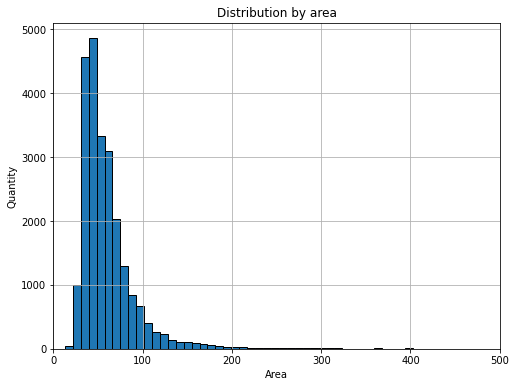

In [71]:
print(df['total_area'].describe())

df['total_area'].hist(bins=100, 
                      figsize = (8,6), 
                      ec='black'
                      )
plt.title('Distribution by area')
plt.ylabel('Quantity')
plt.xlabel('Area')
plt.xlim(0, 500)

From the histogram, we can see a normal distribution, with a very small proportion of apartments with an area less than 25 m2 and more than 140 m2. There is also a peak in the proportion of apartments between 30 and 50 m2.

(0.0, 300.0)

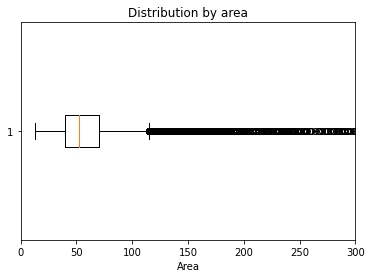

In [72]:
plt.boxplot(df['total_area'], 
            vert=False
            )
plt.title('Distribution by area')
plt.xlabel('Area')
plt.xlim(0, 300)

The boundaries of the range are not clear from the range diagram. Let's write a function that will show these boundaries.

In [73]:
def span_charts(column):
    stat = df[column].describe()
    quantile = stat[6] - stat[4]     
    left_mustache = round(stat[4] - 1.5 * quantile, 2)
    right_mustache = round(stat[6] + 1.5 * quantile, 2)
    if left_mustache < stat[3]:
        left_mustache = stat[3] 
    if right_mustache > stat[7]:
        right_mustache = stat[7]
        
    return [left_mustache, right_mustache]
span_charts('total_area')

[13.0, 115.0]

Let's build a refined histogram.

count    23511.000000
mean        60.395789
std         35.685726
min         13.000000
25%         40.000000
50%         52.000000
75%         70.000000
max        900.000000
Name: total_area, dtype: float64


Text(0.5, 0, 'Area')

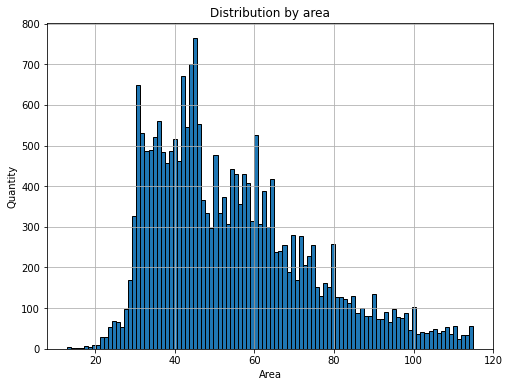

In [74]:
print(df['total_area'].describe())

df['total_area'].hist(bins=100, 
                      range=(13.0, 115.0), 
                      figsize = (8,6), 
                      ec='black'
                      )
plt.title('Distribution by area')
plt.ylabel('Quantity')
plt.xlabel('Area')

As can be seen from the refined histogram, a large proportion of apartments with an area of 30-80 m2 are present on the market.

Let's create a dataframe with "good" data for further analysis.

In [75]:
good_data = df.query('13.0 <= total_area <= 115.0')
good_data.reset_index().head()

,level_0,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fromcenter_category,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
0,0,0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863,16028,1.0,482.0,2.0,755.0,1448,Спальный район,120370,3,3,2019,другой,0.472222,0.231481
1,1,1,7,3350000,40.4,2018-12-04,1,2.7,11,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817,18603,0.0,NaN,0.0,NaN,81,Ленинградская область,82920,1,12,2018,первый,0.460396,0.272277
2,2,2,10,5196000,56.0,2015-08-20,2,2.7,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741,13933,1.0,90.0,2.0,574.0,558,Спальный район,92785,3,8,2015,другой,0.612500,0.148214
3,4,4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856,8098,2.0,112.0,1.0,48.0,121,Спальный район,100000,1,6,2018,другой,0.320000,0.410000
4,5,5,10,2890000,30.4,2018-09-10,1,2.7,12,14.4,5,NaN,False,False,9.1,0,городской посёлок Янино-1,23076,13725,NaN,NaN,NaN,NaN,55,Спальный район,95065,0,9,2018,другой,0.473684,0.299342


In [76]:
round(len(good_data)/len(df), 2)*100

95.0

After discarding outliers, 95% of the original data remains.

#### Let's study the data on price:

Let's build a boxplot and a histogram of the distribution of objects in the dataframe by apartment price.

count    2.351100e+04
mean     6.538550e+06
std      1.087176e+07
min      1.219000e+04
25%      3.429500e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


Text(0.5, 0, 'Price')

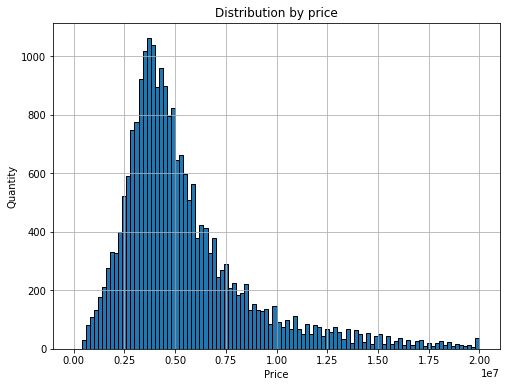

In [77]:
print(df['last_price'].describe())

df['last_price'].hist(bins=100, 
                      figsize = (8,6), 
                      range=(0, 20000000.0), 
                      ec='black')
plt.title('Distribution by price')
plt.ylabel('Quantity')
plt.xlabel('Price')

From the histogram, we can see a normal distribution, with a very small proportion of apartments priced below 1 million and above 10 million. There is also a peak in the proportion of apartments priced between 3 and 5 million.

Text(0.5, 0, 'Price')

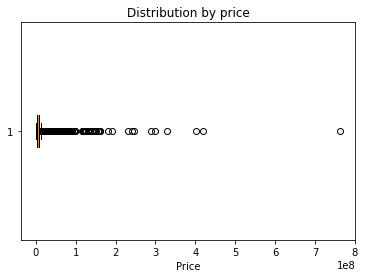

In [78]:
plt.boxplot(df['last_price'], 
            vert=False)
plt.title('Distribution by price')
plt.xlabel('Price')
#plt.xlim(0, 20000000)

From the range diagram, the boundaries are not very clear.

In [79]:
span_charts('last_price')

[12190.0, 11855750.0]

Let's construct a refined histogram.

count    2.351100e+04
mean     6.538550e+06
std      1.087176e+07
min      1.219000e+04
25%      3.429500e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64


Text(0.5, 0, 'Price')

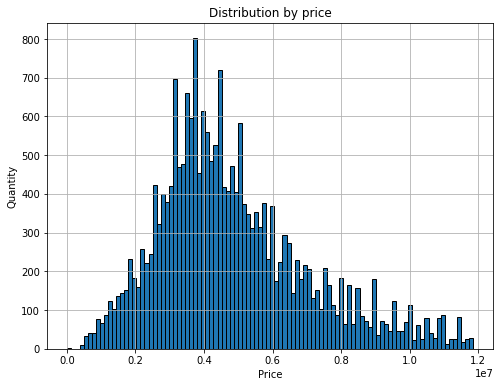

In [80]:
print(df['last_price'].describe())

df['last_price'].hist(bins=100, 
                      figsize = (8,6), 
                      range=(12190.0, 11855750.0), 
                      ec='black')
plt.title('Distribution by price')
plt.ylabel('Quantity')
plt.xlabel('Price')

We will adjust the data within normal values and remove outliers.

In [81]:
good_data = good_data.query('12190.0 <= last_price <= 11855750.0')
good_data.reset_index().head()

,level_0,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fromcenter_category,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
0,1,1,7,3350000,40.4,2018-12-04,1,2.7,11,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817,18603,0.0,NaN,0.0,NaN,81,Ленинградская область,82920,1,12,2018,первый,0.460396,0.272277
1,2,2,10,5196000,56.0,2015-08-20,2,2.7,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741,13933,1.0,90.0,2.0,574.0,558,Спальный район,92785,3,8,2015,другой,0.612500,0.148214
2,4,4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856,8098,2.0,112.0,1.0,48.0,121,Спальный район,100000,1,6,2018,другой,0.320000,0.410000
3,5,5,10,2890000,30.4,2018-09-10,1,2.7,12,14.4,5,NaN,False,False,9.1,0,городской посёлок Янино-1,23076,13725,NaN,NaN,NaN,NaN,55,Спальный район,95065,0,9,2018,другой,0.473684,0.299342
4,6,6,6,3700000,37.3,2017-11-02,1,2.7,26,10.6,6,NaN,False,False,14.4,1,посёлок Парголово,52996,19143,0.0,NaN,0.0,NaN,155,Ленинградская область,99195,3,11,2017,другой,0.284182,0.386059


In [82]:
round(len(good_data)/len(df), 2)*100

91.0

After discarding outliers, 91% of the initial data remains.

#### Let's study the data on the number of rooms:

We will build a range diagram and a histogram of the distribution of objects in the dataframe according to the number of rooms in the apartment.

count    23511.000000
mean         2.072264
std          1.077914
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


Text(0.5, 0, 'Rooms')

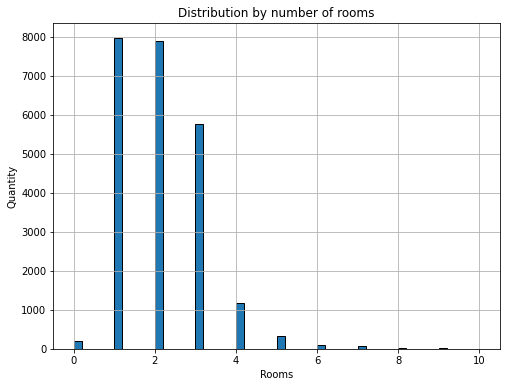

In [83]:
print(df['rooms'].describe())

df['rooms'].hist(bins=50, 
                 figsize = (8,6), 
                 range=(0, 10.0), 
                 ec='black'
                 )
plt.title('Distribution by number of rooms')
plt.ylabel('Quantity')
plt.xlabel('Rooms')

Initially, according to the histogram, we see a normal distribution, we see a very small share of studio apartments and apartments with more than 5 rooms. There is also a peak in the share of 1 and 2-room apartments.

Text(0.5, 0, 'Rooms')

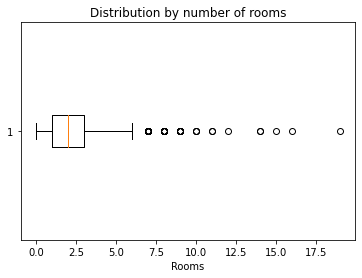

In [84]:
plt.boxplot(df['rooms'], 
            vert=False)
plt.title('Distribution by number of rooms')
plt.xlabel('Rooms')
#plt.xlim(0, 10)

The boundaries are not very clear from the range diagram. Let's calculate these boundaries.

In [85]:
span_charts('rooms')

[0.0, 6.0]

Let's build a refined histogram.

count    23511.000000
mean         2.072264
std          1.077914
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


Text(0.5, 0, 'Rooms')

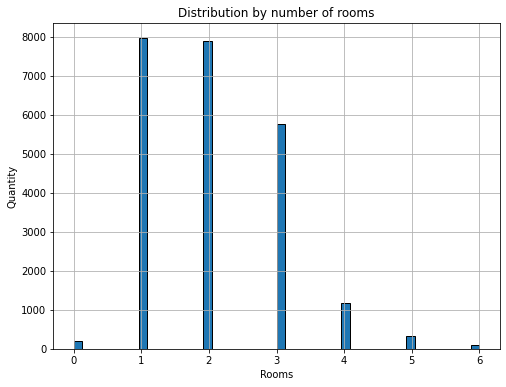

In [86]:
print(df['rooms'].describe())

df['rooms'].hist(bins=50, 
                 figsize = (8,6), 
                 range=(0, 6), 
                 ec='black'
                 )
plt.title('Distribution by number of rooms')
plt.ylabel('Quantity')
plt.xlabel('Rooms')

We will correct the data within normal values and remove outliers.

In [87]:
good_data = good_data.query('rooms <= 6')
good_data.reset_index().head()

,level_0,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fromcenter_category,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
0,1,1,7,3350000,40.4,2018-12-04,1,2.7,11,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817,18603,0.0,NaN,0.0,NaN,81,Ленинградская область,82920,1,12,2018,первый,0.460396,0.272277
1,2,2,10,5196000,56.0,2015-08-20,2,2.7,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741,13933,1.0,90.0,2.0,574.0,558,Спальный район,92785,3,8,2015,другой,0.612500,0.148214
2,4,4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856,8098,2.0,112.0,1.0,48.0,121,Спальный район,100000,1,6,2018,другой,0.320000,0.410000
3,5,5,10,2890000,30.4,2018-09-10,1,2.7,12,14.4,5,NaN,False,False,9.1,0,городской посёлок Янино-1,23076,13725,NaN,NaN,NaN,NaN,55,Спальный район,95065,0,9,2018,другой,0.473684,0.299342
4,6,6,6,3700000,37.3,2017-11-02,1,2.7,26,10.6,6,NaN,False,False,14.4,1,посёлок Парголово,52996,19143,0.0,NaN,0.0,NaN,155,Ленинградская область,99195,3,11,2017,другой,0.284182,0.386059


In [88]:
round(len(good_data)/len(df), 2)*100

91.0

Afterwards, 91% of the original data remains.

#### Let's study the data on ceiling heights:

We will build a range diagram and a histogram of the objects in the dataframe according to the ceiling height in the apartment.

count    23439.000000
mean         2.740467
std          0.237115
min          2.500000
25%          2.600000
50%          2.700000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64


Text(0.5, 0, 'Ceiling height')

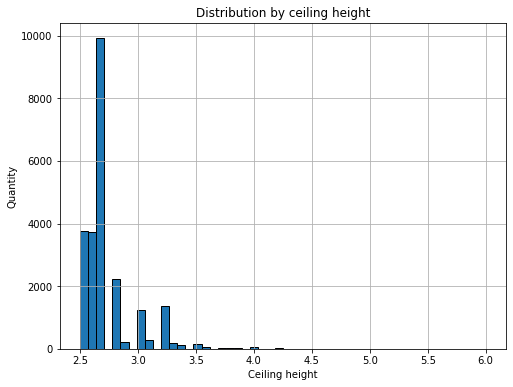

In [89]:
print(df['ceiling_height'].describe())

df['ceiling_height'].hist(bins=50, 
                          figsize = (8,6), 
                          ec='black')
plt.title('Distribution by ceiling height')
plt.ylabel('Quantity')
plt.xlabel('Ceiling height')

Preliminarily, according to the histogram, we see a very small share of apartments with a ceiling height less than 2.5 m and more than 3.2 m. There is also a peak in the share of apartments with a ceiling height of 2.7 m.

(2.4, 4.0)

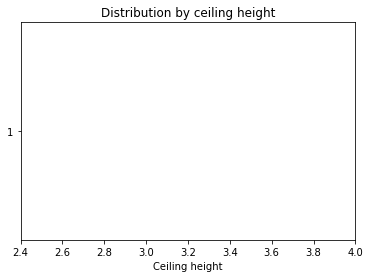

In [157]:
plt.boxplot(df['ceiling_height'], 
            vert=False)
plt.title('Distribution by ceiling height')
plt.xlabel('Ceiling height')
plt.xlim(2.4, 4.0)

Let's calculate the range boundaries.

In [91]:
span_charts('ceiling_height')

[2.5, 3.1]

We will build a refined histogram.

count    23439.000000
mean         2.740467
std          0.237115
min          2.500000
25%          2.600000
50%          2.700000
75%          2.800000
max          6.000000
Name: ceiling_height, dtype: float64


Text(0.5, 0, 'Ceiling height')

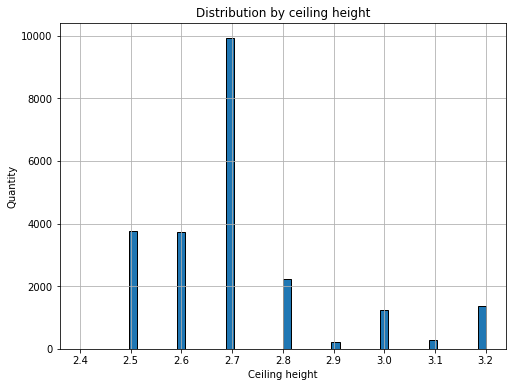

In [92]:
print(df['ceiling_height'].describe())

df['ceiling_height'].hist(bins=50, 
                          figsize = (8,6), 
                          range=(2.4, 3.2), 
                          ec='black')
plt.title('Distribution by ceiling height')
plt.ylabel('Quantity')
plt.xlabel('Ceiling height')

We will correct the data within normal values and remove outliers. We will increase the range boundary as when correcting by the calculated boundaries we lose a lot of data.

In [93]:
good_data = good_data.query('ceiling_height <= 4')
good_data.reset_index().head()

,level_0,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fromcenter_category,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio
0,1,1,7,3350000,40.4,2018-12-04,1,2.7,11,18.6,1,NaN,False,False,11.0,2,посёлок Шушары,12817,18603,0.0,NaN,0.0,NaN,81,Ленинградская область,82920,1,12,2018,первый,0.460396,0.272277
1,2,2,10,5196000,56.0,2015-08-20,2,2.7,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741,13933,1.0,90.0,2.0,574.0,558,Спальный район,92785,3,8,2015,другой,0.612500,0.148214
2,4,4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856,8098,2.0,112.0,1.0,48.0,121,Спальный район,100000,1,6,2018,другой,0.320000,0.410000
3,5,5,10,2890000,30.4,2018-09-10,1,2.7,12,14.4,5,NaN,False,False,9.1,0,городской посёлок Янино-1,23076,13725,NaN,NaN,NaN,NaN,55,Спальный район,95065,0,9,2018,другой,0.473684,0.299342
4,6,6,6,3700000,37.3,2017-11-02,1,2.7,26,10.6,6,NaN,False,False,14.4,1,посёлок Парголово,52996,19143,0.0,NaN,0.0,NaN,155,Ленинградская область,99195,3,11,2017,другой,0.284182,0.386059


Let's additionally build a histogram of the distribution of apartments by the category of the object's location from the center of St. Petersburg.

count              23511
unique                 3
top       Спальный район
freq               14164
Name: fromcenter_category, dtype: object


Text(0.5, 0, 'Fromcenter category')

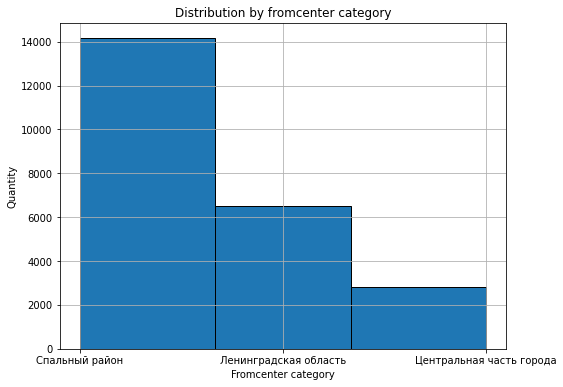

In [94]:
print(df['fromcenter_category'].describe())

df['fromcenter_category'].hist(bins=3, 
                               figsize = (8,6), 
                               ec='black')
plt.title('Distribution by fromcenter category')
plt.ylabel('Quantity')
plt.xlabel('Fromcenter category')

We will check the proportion of data that has been preserved.

In [95]:
round(len(good_data)/len(df), 2)*100

90.0

90% of the data has been preserved for analysis.

In [96]:
good_data[['total_area','last_price','rooms','ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,21209.000000,2.120900e+04,21209.000000,21209.000000
mean,52.697364,4.808936e+06,1.914187,2.707582
std,17.774957,2.177893e+06,0.889390,0.189905
min,13.000000,1.219000e+04,0.000000,2.500000
25%,39.000000,3.300000e+06,1.000000,2.600000
50%,49.000000,4.400000e+06,2.000000,2.700000
75%,63.000000,5.950000e+06,3.000000,2.700000
max,115.000000,1.185000e+07,6.000000,4.000000


### Conclusion:

Based on the analysis of the dataframe, the preliminary picture of the apartment offered for sale is as follows: on average, a two-room apartment in the "Sleeping District" of St. Petersburg with a ceiling height of 2.7 m, an area of 49 m2 for 4.35 million is offered for sale. There is also a sufficient spread in the sample both in terms of total area, number of rooms and price.

### 4.2. Let's study the time of sale of apartments.

Let's take a preliminary look at the data.

In [97]:
df['days_exposition'].describe()

count    23511.000000
mean       372.876356
std        539.846011
min          1.000000
25%         45.000000
50%        125.000000
75%        390.000000
max       3009.000000
Name: days_exposition, dtype: float64

Preliminary from the data we see that the apartment is sold on average for 337 days, but there are objects that are sold for 2742 days or about 7.5 years.

Let's build a histogram of the distribution of apartments by the number of days on sale.

(0.0, 2742.0)

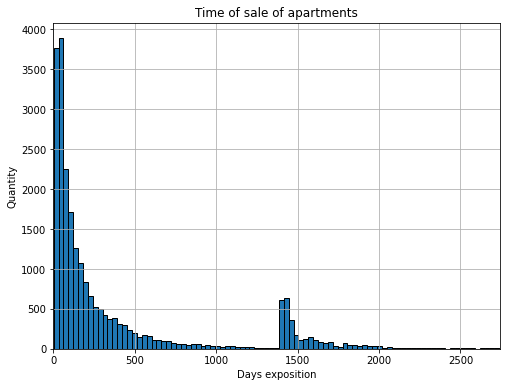

In [98]:
df['days_exposition'].hist(bins=100, 
                           figsize=(8, 6), 
                           ec='black')
plt.title('Time of sale of apartments')
plt.ylabel('Quantity')
plt.xlabel('Days exposition')
plt.xlim(0, 2742)

On the graph there is a strange outlier within the range of 1100 - 1300 days.

(0.0, 20.0)

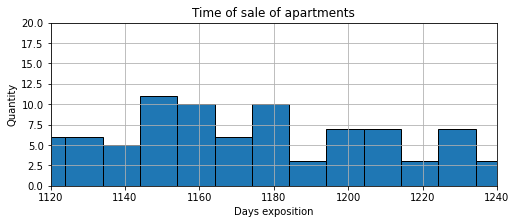

In [99]:
df['days_exposition'].hist(bins=300, 
                           figsize=(8, 3), 
                           ec='black')
plt.title('Time of sale of apartments')
plt.ylabel('Quantity')
plt.xlabel('Days exposition')
plt.xlim(1120, 1240)
plt.ylim(0, 20)

Preliminarily from the histogram we see that the majority of apartments are sold within the first 50 - 60 days. We also see anomalous outliers in the range of 1120 - 1240 days. These outliers negatively affect the average period of sale of apartments, which is 305 days. 

These outliers most likely appeared either due to the reality of cases of stalling the sale of an apartment on the market, possibly the seller inadequately assesses his object, or these apartments have already been sold, but not removed from sale in the system.

(0.0, 1000.0)

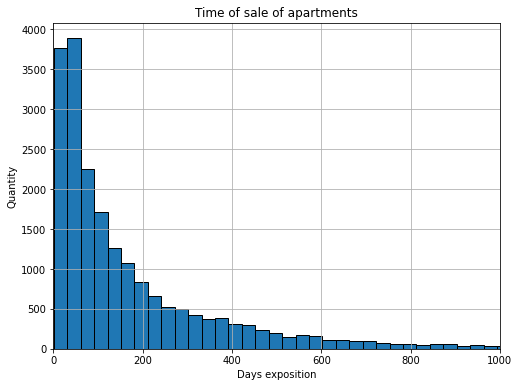

In [100]:
df['days_exposition'].hist(bins=100, 
                           figsize=(8, 6), 
                           ec='black')
plt.title('Time of sale of apartments')
plt.ylabel('Quantity')
plt.xlabel('Days exposition')
plt.xlim(0, 1000)

Let's build a range diagram.

(0.0, 1000.0)

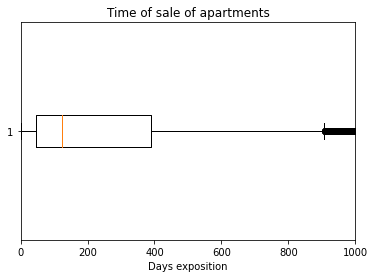

In [101]:
plt.boxplot(df['days_exposition'], vert=False)
plt.title('Time of sale of apartments')
plt.xlabel('Days exposition')
plt.xlim(0, 1000)

We will calculate the range boundaries.

In [102]:
span_charts('days_exposition')

[1.0, 907.5]

We will adjust the data within normal values and remove outliers.

In [103]:
good_data = good_data.query('days_exposition <= 907.5')

In [104]:
good_data['days_exposition'].describe()

count    18313.000000
mean       156.631409
std        173.110908
min          1.000000
25%         43.000000
50%         89.000000
75%        208.000000
max        906.000000
Name: days_exposition, dtype: float64

In [105]:
round(len(good_data)/len(df), 2)*100

78.0

After discarding the outliers, 78% of the initial data remains.

Let's build a range diagram in the range of sales days up to 908 days.

(1.0, 908.0)

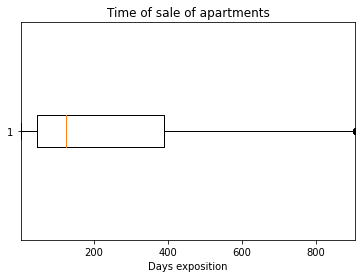

In [106]:
plt.boxplot(df['days_exposition'], 
            vert=False)
plt.title('Time of sale of apartments')
plt.xlabel('Days exposition')
plt.xlim(1, 908)

As we can see, the main volume of apartment sales occurs in the period of 45-400 days.

In [107]:
df['days_exposition'].describe()

count    23511.000000
mean       372.876356
std        539.846011
min          1.000000
25%         45.000000
50%        125.000000
75%        390.000000
max       3009.000000
Name: days_exposition, dtype: float64

Let's build a corrected histogram.

(1.0, 908.0)

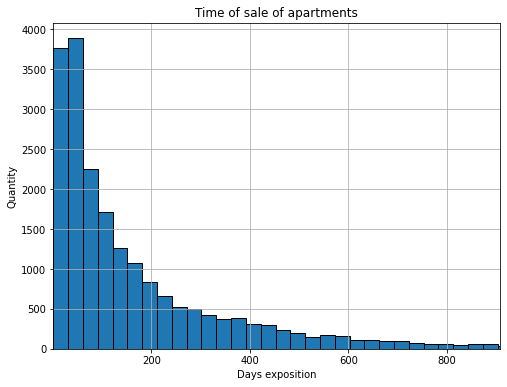

In [108]:
df['days_exposition'].hist(bins=100, 
                           figsize=(8, 6), 
                           ec='black')
plt.title('Time of sale of apartments')
plt.ylabel('Quantity')
plt.xlabel('Days exposition')
plt.xlim(1, 908)

Let's build a separate histogram of the distribution of apartments in the sales period of 42-395 days.

(42.0, 395.0)

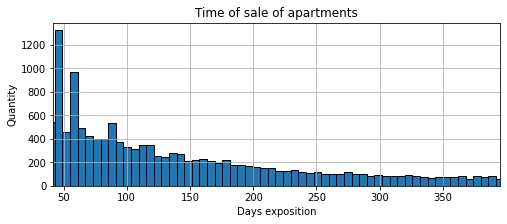

In [109]:
df['days_exposition'].hist(bins=500, 
                           figsize=(8, 3), 
                           ec='black')
plt.title('Time of sale of apartments')
plt.ylabel('Quantity')
plt.xlabel('Days exposition')
plt.xlim(42,395)

We can see clear outliers within 125 days.

In [110]:
df[df['days_exposition']!=0]['days_exposition'].value_counts().head(10)

45    874
60    533
7     228
30    208
90    203
4     175
3     156
5     149
14    147
9     143
Name: days_exposition, dtype: int64

As we can see, in the period of the main volume of sales, there are outliers in 7, 30, 45, 60, 90 days.

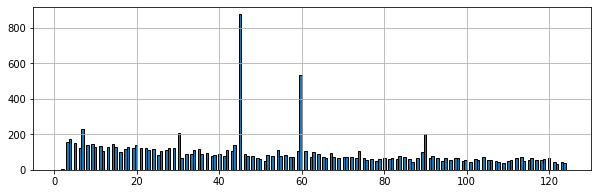

In [111]:
df.query('0 < days_exposition < 125')['days_exposition'].hist(bins=200, 
                                                              figsize=(10,3), 
                                                              ec='black')

As expected, these outliers have a multiplicity of 15 days and the peaks at 45 and 60 days are particularly visible. According to the conditions of placing ads in Yandex Real Estate, ads are automatically removed from publication at 45 and 60 days, depending on the type. In my opinion, these outliers are anomalies and can be excluded from the sample.

Let's exclude these anomalies.

In [112]:
good_data = good_data.query('days_exposition != 45.0 and days_exposition != 60.0')

In [113]:
round(len(good_data)/len(df), 2)*100

72.0

After discarding the outliers, 72% of the initial data remains.

In [114]:
df['days_exposition'].describe()

count    23511.000000
mean       372.876356
std        539.846011
min          1.000000
25%         45.000000
50%        125.000000
75%        390.000000
max       3009.000000
Name: days_exposition, dtype: float64

In [115]:
good_data['days_exposition'].describe()

count    16923.000000
mean       165.334220
std        177.275781
min          1.000000
25%         39.000000
50%        100.000000
75%        225.000000
max        906.000000
Name: days_exposition, dtype: float64

Text(0.5, 0, 'Days exposition')

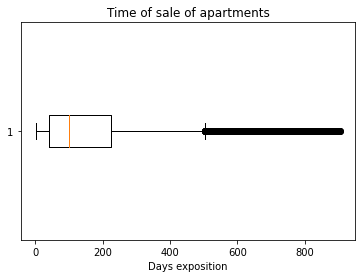

In [116]:
plt.boxplot(good_data['days_exposition'], 
            vert=False)
plt.title('Time of sale of apartments')
plt.xlabel('Days exposition')
#plt.xlim(1, 709)

Text(0.5, 0, 'Days exposition')

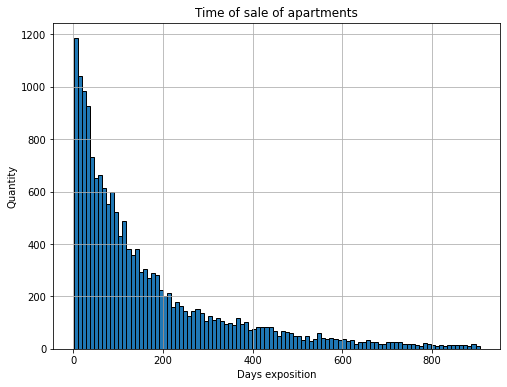

In [117]:
good_data['days_exposition'].hist(bins=100, 
                                  figsize=(8, 6), 
                                  ec='black')
plt.title('Time of sale of apartments')
plt.ylabel('Quantity')
plt.xlabel('Days exposition')
#plt.xlim(42, 201)

(100.0, 500.0)

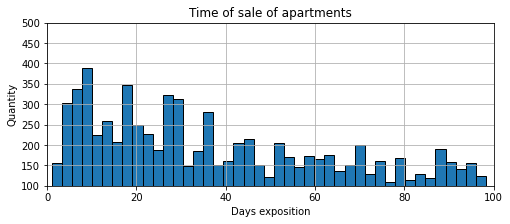

In [158]:
good_data['days_exposition'].hist(bins=400, 
                                  figsize=(8, 3), 
                                  ec='black')
plt.title('Time of sale of apartments')
plt.ylabel('Quantity')
plt.xlabel('Days exposition')
plt.xlim(0, 100)
plt.ylim(100, 500)

### Conclusion:
As expected, the mean and median values of the cleaned data decreased from 337 and 165 days to 125 and 100 days, respectively. Normal values now range from 906 days instead of 2742. From the data, we can see that the majority of apartment sales occur within 225 days, and on average, an apartment is sold within 100 days or slightly more than 3 months. Also, if a deal is completed within 39 days, either you were lucky or you are a good seller.

### 4.3. Let's study the dependence of the price per square meter on the total area of the apartment, the number of rooms, the floor, the distance from the center.

We will build a heat map of the dependencies of all parameters of the dataframe.

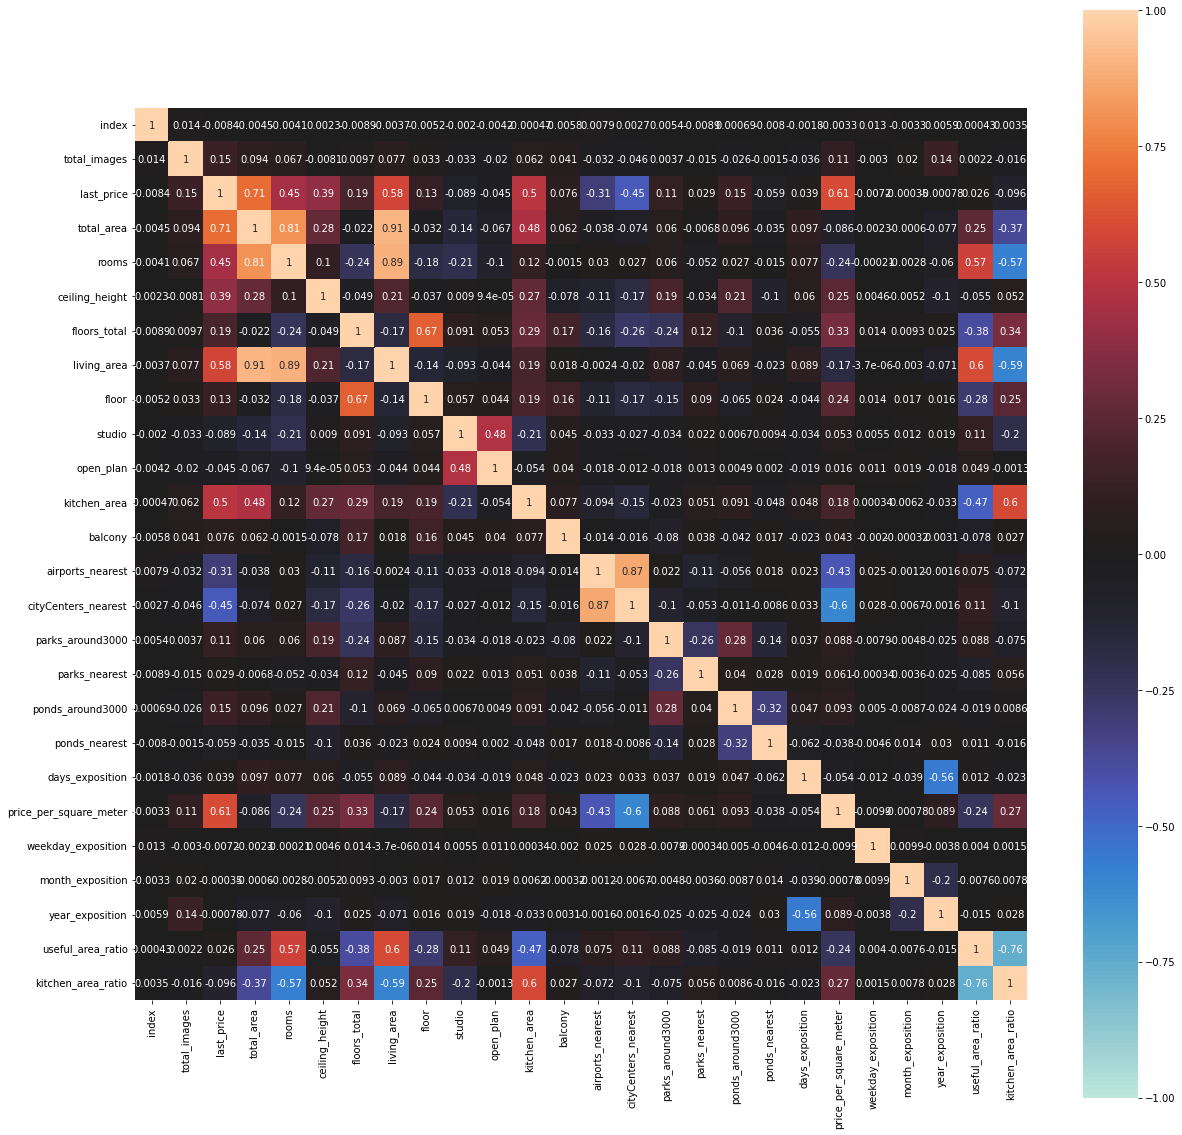

In [119]:
fig, ax = plt.subplots(figsize=(20,20))
sb.heatmap(good_data.corr(), 
           annot=True, 
           square=True, 
           vmin=-1, 
           vmax=1, 
           center=0, 
           ax=ax)

As we can see, the price per square meter is related to the total price, total area, number of rooms, ceiling height, total number of floors of the building, current floor, living area, kitchen area and infrastructure - distance to the city center, airport, as well as the presence of parks and lakes.

#### Let's study the dependence of the price per square meter on the total area of the apartment.

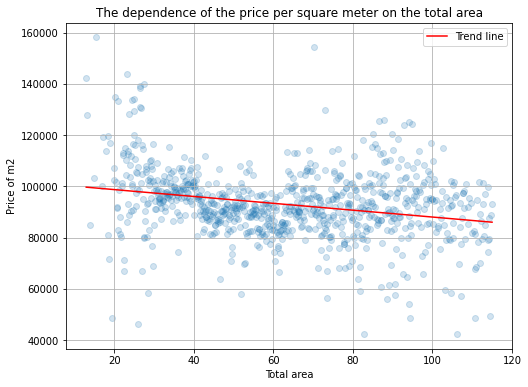

In [120]:
pivot_table_total_area = good_data.pivot_table(index = 'total_area', 
                                               values = 'price_per_square_meter', 
                                               aggfunc = ['mean', 'count', 'median']
                                               ).reset_index()

pivot_table_total_area.columns = ['total_area','mean', 'count', 'median']
x = pivot_table_total_area['total_area']
y = pivot_table_total_area['median']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.2)
plt.title('The dependence of the price per square meter on the total area')
plt.ylabel('Price of m2')
plt.xlabel('Total area')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Trend line'])
plt.show()

Conclusion: We can see that with an increase in the total area of the apartment, the price per square meter decreases. This is logical due to the discount for bulk purchases.

#### Additionally, we will study the dependence of the price per square meter on the area of the kitchen and living area.

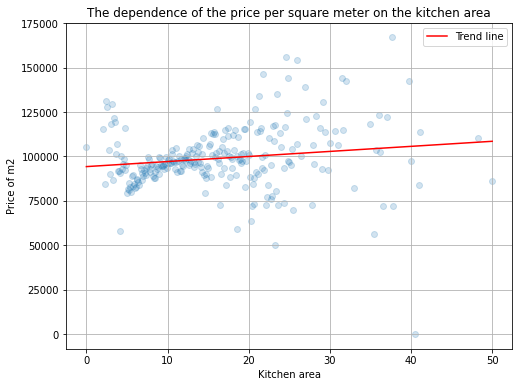

In [121]:
pivot_table_kitchen = good_data.pivot_table(index = 'kitchen_area', 
                                            values = 'price_per_square_meter', 
                                            aggfunc = ['mean', 'count', 'median']
                                            ).reset_index()

pivot_table_kitchen.columns = ['kitchen_area','mean', 'count', 'median']
x = pivot_table_kitchen['kitchen_area']
y = pivot_table_kitchen['median']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.2)
plt.title('The dependence of the price per square meter on the kitchen area')
plt.ylabel('Price of m2')
plt.xlabel('Kitchen area')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Trend line'])
plt.show()

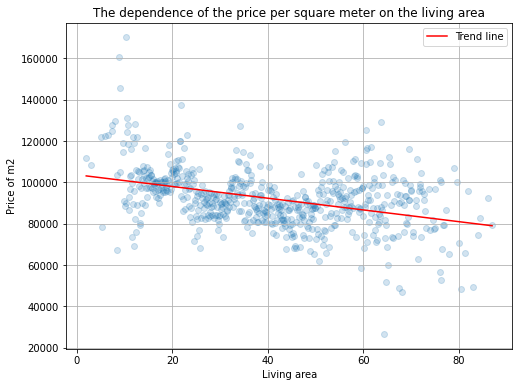

In [122]:
pivot_table_living = good_data.pivot_table(index = 'living_area', 
                                           values = 'price_per_square_meter', 
                                           aggfunc = ['mean', 'count', 'median']
                                           ).reset_index()

pivot_table_living.columns = ['living_area','mean', 'count', 'median']
x = pivot_table_living['living_area']
y = pivot_table_living['median']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.2)
plt.title('The dependence of the price per square meter on the living area')
plt.ylabel('Price of m2')
plt.xlabel('Living area')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Trend line'])
plt.show()

Conclusion: We can see simultaneously that with an increase in the area of the kitchen, the price per square meter increases, but with an increase in the living area, we can see a decrease in the price per square meter. Such a two-way dependence shows the value of the size of the kitchen compared to the living area.

#### We will study the dependence of the price per square meter on the number of rooms.

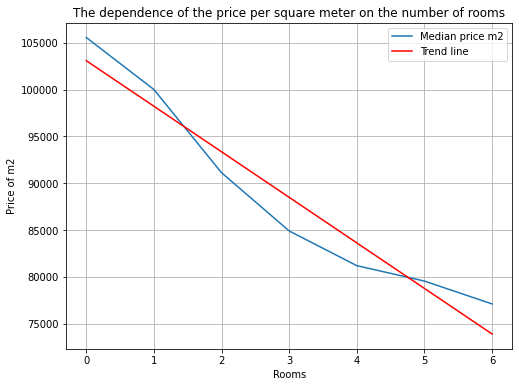

In [123]:
pivot_table_rooms = good_data.pivot_table(index = 'rooms', 
                                          values = 'price_per_square_meter', 
                                          aggfunc = ['mean', 'count', 'median']
                                          ).reset_index()

pivot_table_rooms.columns = ['rooms','mean', 'count', 'median']
x = pivot_table_rooms['rooms']
y = pivot_table_rooms['median']

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('The dependence of the price per square meter on the number of rooms')
plt.ylabel('Price of m2')
plt.xlabel('Rooms')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Median price m2', 'Trend line'])
plt.show()

Conclusion: In the limit up to 5 rooms, a practically linear dependence of the price per square meter on the number of rooms is observed. The more rooms, the lower the price per square meter.

#### We will study the dependence of the price per square meter on the floor of the apartment.

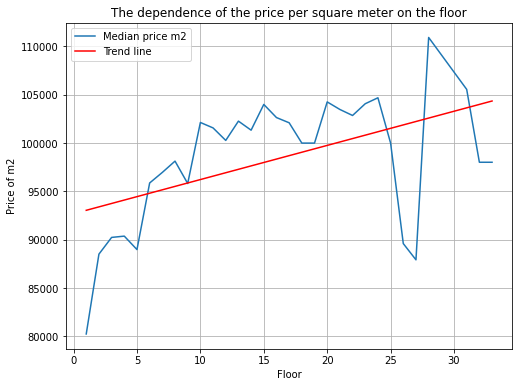

In [124]:
pivot_table_floor = good_data.pivot_table(index = 'floor', 
                                          values = 'price_per_square_meter', 
                                          aggfunc = ['mean', 'count', 'median']
                                          ).reset_index()

pivot_table_floor.columns = ['floor','mean', 'count', 'median']
x = pivot_table_floor['floor']
y = pivot_table_floor['median']

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('The dependence of the price per square meter on the floor')
plt.ylabel('Price of m2')
plt.xlabel('Floor')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Median price m2', 'Trend line'])
plt.show()

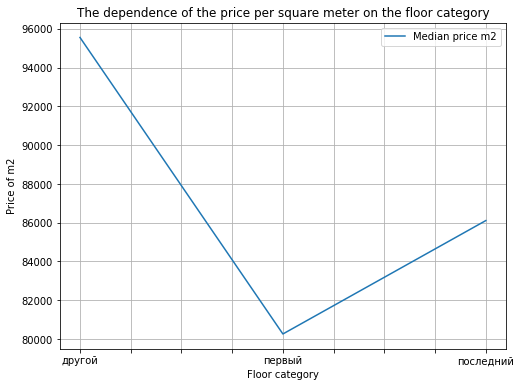

In [125]:
pivot_table_floor_category = good_data.pivot_table(index = 'floor_category', 
                                                   values = 'price_per_square_meter', 
                                                   aggfunc = ['mean', 'count', 'median']
                                                   )

pivot_table_floor_category.columns = ['mean', 'count', 'median']
pivot_table_floor_category.plot(y = 'median', figsize=(8, 6))
plt.title('The dependence of the price per square meter on the floor category')
plt.ylabel('Price of m2')
plt.xlabel('Floor category')
plt.legend(['Median price m2'])
plt.grid(True)

Conclusion: With an increase in the floor of the apartment, the price per square meter also increases. Also, a low value of the first floor compared to the last is visible.

#### Additionally, we will study the dependence of the price per square meter on the total number of floors in the building.

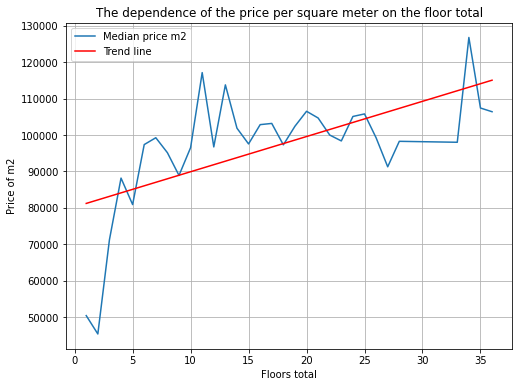

In [126]:
pivot_table_floors_total = good_data.pivot_table(index = 'floors_total', 
                                                 values = 'price_per_square_meter', 
                                                 aggfunc = ['mean', 'count', 'median']
                                                 ).reset_index()

pivot_table_floors_total.columns = ['floors_total','mean', 'count', 'median']
x = pivot_table_floors_total['floors_total']
y = pivot_table_floors_total['median']

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('The dependence of the price per square meter on the floor total')
plt.ylabel('Price of m2')
plt.xlabel('Floors total')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Median price m2', 'Trend line'])
plt.show()

Conclusion: With an increase in the number of floors in the building, the price per square meter sharply increases, but in buildings with a total number of floors of 10 and higher, the growth rate slows down. This is most likely due to the fact that high-rise construction is characteristic of residential areas of the city.

#### We will study the dependence of the price per square meter on the height of the ceilings.

0.24622714663944095


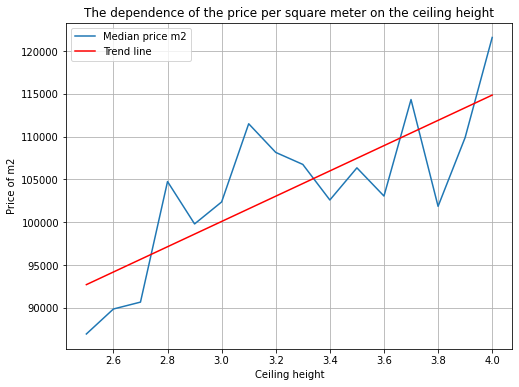

In [127]:
print(good_data['ceiling_height'].corr(good_data['price_per_square_meter']))

pivot_table_floors_total = good_data.pivot_table(index = 'ceiling_height', 
                                                 values = 'price_per_square_meter', 
                                                 aggfunc = ['mean', 'count', 'median']
                                                 ).reset_index()

pivot_table_floors_total.columns = ['ceiling_height','mean', 'count', 'median']
x = pivot_table_floors_total['ceiling_height']
y = pivot_table_floors_total['median']

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('The dependence of the price per square meter on the ceiling height')
plt.ylabel('Price of m2')
plt.xlabel('Ceiling height')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Median price m2', 'Trend line'])
plt.show()

Conclusion: We can see that with an increase in the height of the ceilings, the price per square meter also increases.

#### We will study the dependence of the price per square meter on the distance to the city center.

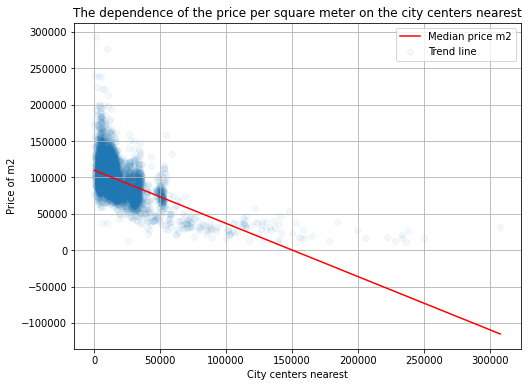

In [128]:
pivot_table_c_c = good_data.pivot_table(index = 'cityCenters_nearest', 
                                        values = 'price_per_square_meter', 
                                        aggfunc = ['mean', 'count', 'median']
                                        ).reset_index()

pivot_table_c_c.columns = ['cityCenters_nearest','mean', 'count', 'median']
x = pivot_table_c_c['cityCenters_nearest']
y = pivot_table_c_c['median']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.05)
plt.title('The dependence of the price per square meter on the city centers nearest')
plt.ylabel('Price of m2')
plt.xlabel('City centers nearest')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Median price m2', 'Trend line'])
plt.show()

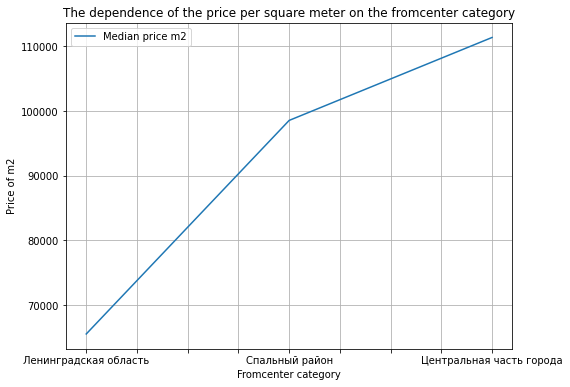

In [129]:
pivot_table_fromcenter_category = good_data.pivot_table(index = 'fromcenter_category', 
                                                        values = 'price_per_square_meter', 
                                                        aggfunc = ['mean', 'count', 'median']
                                                        )

pivot_table_fromcenter_category.columns = ['mean', 'count', 'median']

pivot_table_fromcenter_category.plot(y = 'median', figsize=(8, 6))
plt.title('The dependence of the price per square meter on the fromcenter category')
plt.ylabel('Price of m2')
plt.xlabel('Fromcenter category')
plt.legend(['Median price m2'])
plt.grid(True)

Conclusion: we can clearly see the dependence of the price per square meter on the distance to the city center. The price per square meter increases as it approaches the city center.

#### Additionally, we will study the dependence of the price per square meter on the distance to the nearest airport.

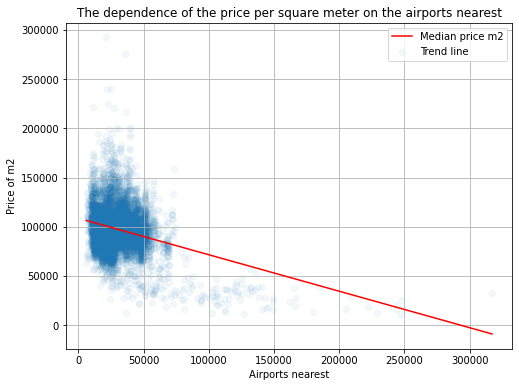

In [130]:
pivot_table_a_c = good_data.pivot_table(index = 'airports_nearest', 
                                        values = 'price_per_square_meter', 
                                        aggfunc = ['mean', 'count', 'median']
                                        ).reset_index()

pivot_table_a_c.columns = ['airports_nearest','mean', 'count', 'median']
x = pivot_table_a_c['airports_nearest']
y = pivot_table_a_c['median']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.05)
plt.title('The dependence of the price per square meter on the airports nearest')
plt.ylabel('Price of m2')
plt.xlabel('Airports nearest')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Median price m2', 'Trend line'])
plt.show()

Conclusion: we can clearly see the dependence of the price per square meter on the distance to the airport. The price per square meter increases as the distance to the nearest airport decreases.

### 4.4. We will study the dependence of the price per square meter on the date of placement.

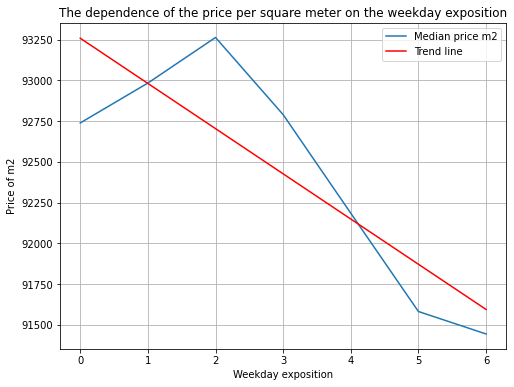

In [131]:
pivot_table_weekday_exposition = good_data.pivot_table(index = 'weekday_exposition', 
                                                       values = 'price_per_square_meter', 
                                                       aggfunc = ['mean', 'count', 'median']
                                                       ).reset_index()

pivot_table_weekday_exposition.columns = ['weekday_exposition','mean', 'count', 'median']
x = pivot_table_weekday_exposition['weekday_exposition']
y = pivot_table_weekday_exposition['median']

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('The dependence of the price per square meter on the weekday exposition')
plt.ylabel('Price of m2')
plt.xlabel('Weekday exposition')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Median price m2', 'Trend line'])
plt.show()

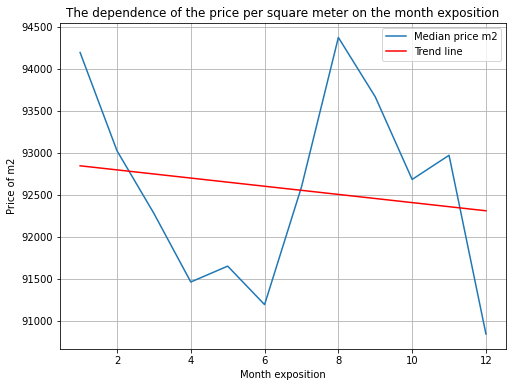

In [132]:
pivot_table_month_exposition = good_data.pivot_table(index = 'month_exposition', 
                                                     values = 'price_per_square_meter', 
                                                     aggfunc = ['mean', 'count', 'median']
                                                     ).reset_index()

pivot_table_month_exposition.columns = ['month_exposition','mean', 'count', 'median']
x = pivot_table_month_exposition['month_exposition']
y = pivot_table_month_exposition['median']

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('The dependence of the price per square meter on the month exposition')
plt.ylabel('Price of m2')
plt.xlabel('Month exposition')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Median price m2', 'Trend line'])
plt.show()

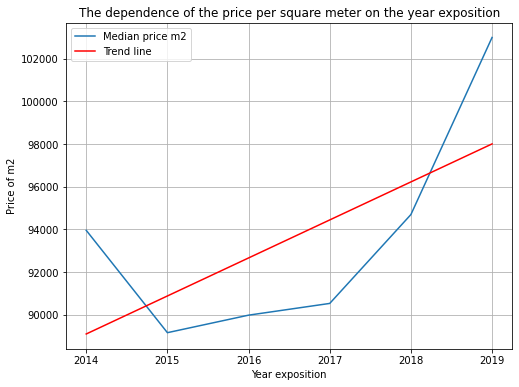

In [133]:
pivot_table_year_exposition = good_data.pivot_table(index = 'year_exposition', 
                                                    values = 'price_per_square_meter', 
                                                    aggfunc = ['mean', 'count', 'median']
                                                    ).reset_index()

pivot_table_year_exposition.columns = ['year_exposition','mean', 'count', 'median']
x = pivot_table_year_exposition['year_exposition']
y = pivot_table_year_exposition['median']

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('The dependence of the price per square meter on the year exposition')
plt.ylabel('Price of m2')
plt.xlabel('Year exposition')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Median price m2', 'Trend line'])
plt.show()

Conclusion:

* The dependence of the price per square meter on the day of the week of the ad placement is weak, the correlation coefficient is 0.09. According to the graph, it can be said that the price per square meter of ads on weekdays is higher than on weekends.

* The correlation between the price per square meter and the month of advertisement placement is very weak, with a correlation coefficient of 0.004. According to the graph, there is a clear seasonal demand on the market - the price per square meter of advertisements is highest in the first and third quarters of the year. At the same time, considering the purchase of an apartment in the second quarter and towards the end of the year, one can purchase it with a good discount.

* The dependence of the price per square meter on the year of the advertisement placement is weak, with a correlation coefficient of 0.09. According to the graph, after the 2014 crisis, with a clear inertia, the price per square meter decreases and the minimum price is at the beginning of 2015. Further price growth starting from 2015, with an increasing growth rate from year to year, shows the state of the country's economy and how it was indirectly recovering and growing.

### 4.5. Let's select 10 settlements with the highest number of announcements.

In [134]:
data_pivot_locality_name = good_data.pivot_table(index='locality_name', 
                                                 values='price_per_square_meter', 
                                                 aggfunc=['count','mean','median']
                                                 ).round(1)
data_pivot_locality_name.columns = ['count','mean','median']
data_pivot_locality_name = data_pivot_locality_name.sort_values('count', ascending=False).head(10)
data_pivot_locality_name

,count,mean,median
locality_name,,,
Санкт-Петербург,11057,104401.4,101052.0
посёлок Мурино,465,85653.0,85714.0
посёлок Шушары,375,78135.8,76125.0
Всеволожск,294,66694.5,65525.5
Колпино,268,74874.0,74256.0
посёлок Парголово,260,90031.4,92096.5
Пушкин,257,99824.5,97402.0
деревня Кудрово,257,92090.5,91569.0
Гатчина,236,67946.1,67123.0


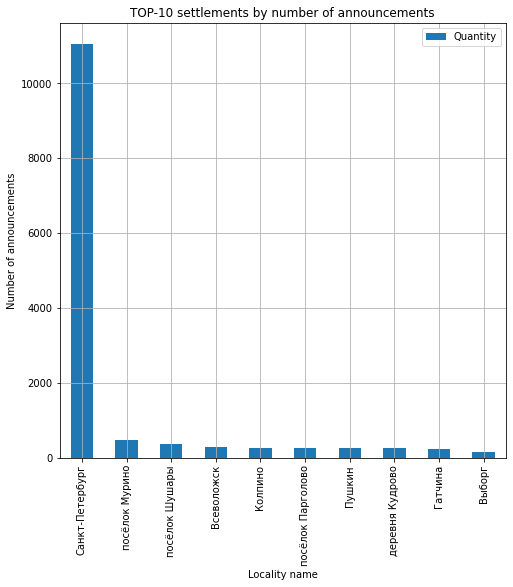

In [135]:
data_pivot_locality_name.plot(y = 'count', 
                              figsize=(8, 8), 
                              kind="bar", 
                              rot=90)
plt.title('TOP-10 settlements by number of announcements')
plt.ylabel('Number of announcements')
plt.xlabel('Locality name')
plt.legend(['Quantity'])
plt.grid(True)

In [136]:
data_pivot_locality_name[data_pivot_locality_name['mean']==data_pivot_locality_name['mean'].max()]

,count,mean,median
locality_name,,,
Санкт-Петербург,11057,104401.4,101052.0


In [137]:
data_pivot_locality_name[data_pivot_locality_name['mean']==data_pivot_locality_name['mean'].min()]

,count,mean,median
locality_name,,,
Выборг,168,57537.4,57404.5


Conclusion: we can see that in this ranking of settlements by number of announcements, the most expensive housing is in St. Petersburg and Pushkin, and the cheapest is in Vyborg and Gatchina.

#### Let's study the dependence of the price per square meter of the central part of St. Petersburg.

From the normal data, let's make a sample for St. Petersburg.

In [138]:
data_spb = good_data.query('locality_name == "Санкт-Петербург"')
data_spb['cityCenters_nearest_km'] = (data_spb['cityCenters_nearest']/1000).round()
data_spb.reset_index().head()

<ipython-input-138-80ff187adceb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb['cityCenters_nearest_km'] = (data_spb['cityCenters_nearest']/1000).round()


,level_0,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fromcenter_category,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio,cityCenters_nearest_km
0,2,2,10,5196000,56.0,2015-08-20,2,2.7,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741,13933,1.0,90.0,2.0,574.0,558,Спальный район,92785,3,8,2015,другой,0.612500,0.148214,14.0
1,4,4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856,8098,2.0,112.0,1.0,48.0,121,Спальный район,100000,1,6,2018,другой,0.320000,0.410000,8.0
2,9,9,18,5400000,61.0,2017-02-26,3,2.5,9,43.6,7,NaN,False,False,6.5,2,Санкт-Петербург,50898,15008,0.0,NaN,0.0,NaN,289,Спальный район,88524,6,2,2017,другой,0.714754,0.106557,15.0
3,10,10,5,5050000,39.6,2017-11-16,1,2.7,12,20.3,3,NaN,False,False,8.5,0,Санкт-Петербург,38357,13878,1.0,310.0,2.0,553.0,137,Спальный район,127525,3,11,2017,другой,0.512626,0.214646,14.0
4,15,15,16,4650000,39.0,2017-11-18,1,2.7,14,20.5,5,NaN,False,False,7.6,1,Санкт-Петербург,12900,14259,1.0,590.0,1.0,296.0,19,Спальный район,119230,5,11,2017,другой,0.525641,0.194872,14.0


Let's select the central part of the city.

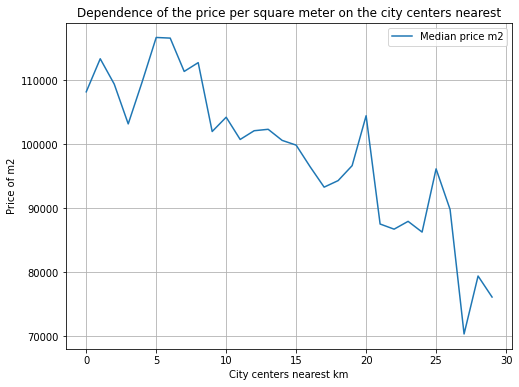

In [139]:
data_spb_pivot = data_spb.pivot_table(index='cityCenters_nearest_km', 
                                      values='price_per_square_meter', 
                                      aggfunc=['median']
                                      ).round(1)
#data_spb_pivot.columns = 'median'
#data_spb_pivot = data_spb_pivot.sort_values('cityCenters_nearest_km', ascending=True)
#data_spb_pivot.columns

data_spb_pivot.plot(y = 'median', figsize=(8, 6))
plt.title('Dependence of the price per square meter on the city centers nearest')
plt.ylabel('Price of m2')
plt.xlabel('City centers nearest km')
plt.legend(['Median price m2'])
plt.grid(True)

(70000.0, 140000.0)

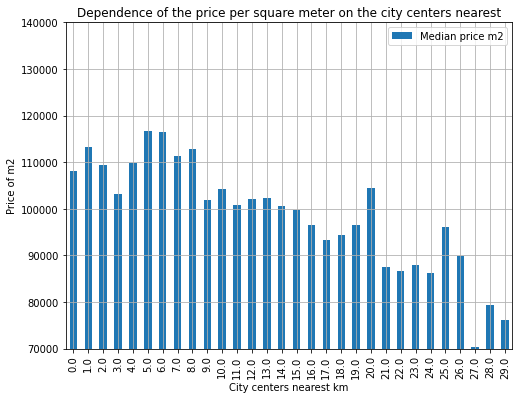

In [140]:
data_spb_pivot.plot(y = 'median', 
                    figsize=(8, 6), 
                    kind="bar", 
                    rot=90)
plt.title('Dependence of the price per square meter on the city centers nearest')
plt.ylabel('Price of m2')
plt.xlabel('City centers nearest km')
plt.legend(['Median price m2'])
plt.grid(True)
plt.ylim(70000, 140000)

Conclusion:  From the graph we can see the unevenness of the distribution, in my opinion this unevenness is connected to the shape of the city and its location. St. Petersburg has an elliptical shape and is oriented from northwest to southeast. If we consider the Palace Square as the center of the city, then the city is located 56 km to the northwest, including Kronstadt and the large water area of the Finnish Gulf, 34 km to the southwest, including Kolpino and Pushkin, 13 km to the northeast, and 20 km to the southwest, including Krasnoe Selo. From the graph we can distinguish the central part of the city within a radius of 8 km, but at the same time there is a depression of 3 km, which may indicate the presence of inexpensive housing from the category of old stock, without capital repairs, with a broken repair of the apartment itself.

#### Let's study the dependence of the price per square meter of the central part of St. Petersburg on the total area. 

In [141]:
spb_centr = data_spb.query('cityCenters_nearest_km <= 8')
spb_centr.reset_index().head()

,level_0,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,fromcenter_category,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,useful_area_ratio,kitchen_area_ratio,cityCenters_nearest_km
0,4,4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856,8098,2.0,112.0,1.0,48.0,121,Спальный район,100000,1,6,2018,другой,0.320000,0.410000,8.0
1,24,24,8,6500000,97.2,2015-10-31,2,3.2,3,46.5,1,NaN,False,False,19.6,0,Санкт-Петербург,20052,2336,3.0,411.0,3.0,124.0,265,Центральная часть города,66872,5,10,2015,первый,0.478395,0.201646,2.0
2,61,61,18,7990000,74.0,2017-08-24,2,3.2,4,43.0,4,NaN,False,False,20.0,0,Санкт-Петербург,22568,4288,1.0,363.0,0.0,NaN,609,Центральная часть города,107972,3,8,2017,последний,0.581081,0.270270,4.0
3,70,70,9,3400000,30.0,2018-09-05,1,2.7,5,16.0,1,NaN,False,False,7.0,0,Санкт-Петербург,39053,8313,1.0,382.0,0.0,NaN,14,Спальный район,113333,2,9,2018,первый,0.533333,0.233333,8.0
4,94,94,3,3500000,29.5,2019-04-26,1,2.5,5,15.6,2,NaN,False,False,5.5,1,Санкт-Петербург,12921,7303,0.0,NaN,0.0,NaN,4,Спальный район,118644,4,4,2019,другой,0.528814,0.186441,7.0


-0.43141052880904457


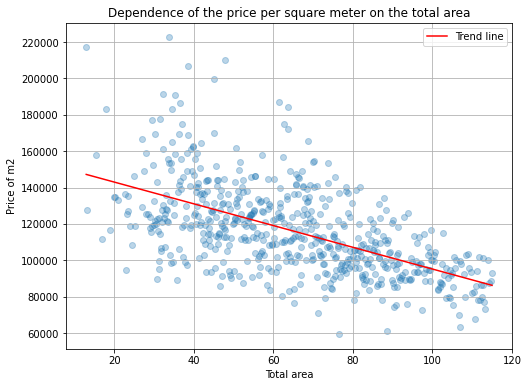

In [142]:
print(spb_centr['total_area'].corr(spb_centr['price_per_square_meter']))

pivot_table_spb_total_area = spb_centr.pivot_table(index = 'total_area', 
                                                   values = 'price_per_square_meter', 
                                                   aggfunc = ['mean', 'count', 'median']
                                                   ).reset_index()

pivot_table_spb_total_area.columns = ['total_area','mean', 'count', 'median']
x = pivot_table_spb_total_area['total_area']
y = pivot_table_spb_total_area['median']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.3)
plt.title('Dependence of the price per square meter on the total area')
plt.ylabel('Price of m2')
plt.xlabel('Total area')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Trend line'])
plt.show()

Conclusion: As we can see, the trend of increasing the price per square meter with decreasing total area of the apartment has been preserved.

#### Additionally, let's study the dependence of the price per square meter of the central part of St. Petersburg on the living area and kitchen area.

0.04285156640941287


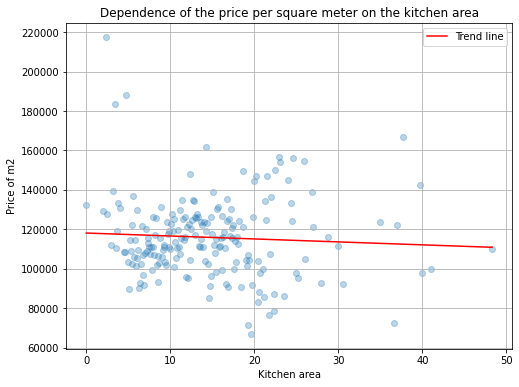

In [143]:
print(spb_centr['kitchen_area'].corr(spb_centr['price_per_square_meter']))

pivot_table_spb_kitchen = spb_centr.pivot_table(index = 'kitchen_area', 
                                                values = 'price_per_square_meter', 
                                                aggfunc = ['mean', 'count', 'median']
                                                ).reset_index()

pivot_table_spb_kitchen.columns = ['kitchen_area','mean', 'count', 'median']
x = pivot_table_spb_kitchen['kitchen_area']
y = pivot_table_spb_kitchen['median']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.3)
plt.title('Dependence of the price per square meter on the kitchen area')
plt.ylabel('Price of m2')
plt.xlabel('Kitchen area')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Trend line'])
plt.show()

-0.4913793312808503


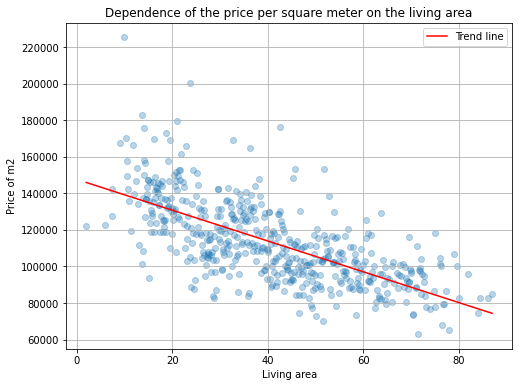

In [144]:
print(spb_centr['living_area'].corr(spb_centr['price_per_square_meter']))

pivot_table_spb_living = spb_centr.pivot_table(index = 'living_area', 
                                               values = 'price_per_square_meter', 
                                               aggfunc = ['mean', 'count', 'median']
                                               ).reset_index()

pivot_table_spb_living.columns = ['living_area','mean', 'count', 'median']
x = pivot_table_spb_living['living_area']
y = pivot_table_spb_living['median']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.3)
plt.title('Dependence of the price per square meter on the living area')
plt.ylabel('Price of m2')
plt.xlabel('Living area')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Trend line'])
plt.show()

Conclusion: We can see an increase in the price per square meter with a decrease in kitchen area and living area.

#### Let's study the dependence of the price per square meter of the central part of St. Petersburg on the number of rooms.

-0.5091625262811205


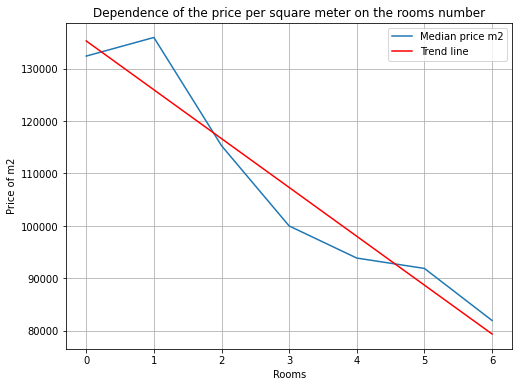

In [145]:
print(spb_centr['rooms'].corr(spb_centr['price_per_square_meter']))

pivot_table_rooms = spb_centr.pivot_table(index = 'rooms', 
                                          values = 'price_per_square_meter', 
                                          aggfunc = ['mean', 'count', 'median']
                                          ).reset_index()

pivot_table_rooms.columns = ['rooms','mean', 'count', 'median']
x = pivot_table_rooms['rooms']
y = pivot_table_rooms['median']

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('Dependence of the price per square meter on the rooms number')
plt.ylabel('Price of m2')
plt.xlabel('Rooms')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Median price m2', 'Trend line'])
plt.show()

Conclusion: We can see that one-room apartments are the most popular in the city center compared to studios, which is logical, since historically there were no studio apartments in the central part of St. Petersburg, they are obtained by converting rooms of communal apartments (apartment in an apartment) into separate premises and the quality of such studio apartments leaves much to be desired (very low). The general trend of increasing the price per square meter with a decrease in the number of rooms has been preserved.

#### Let's study the dependence of the price per square meter of the central part of St. Petersburg on the floor of the apartment.

0.2687087887731944


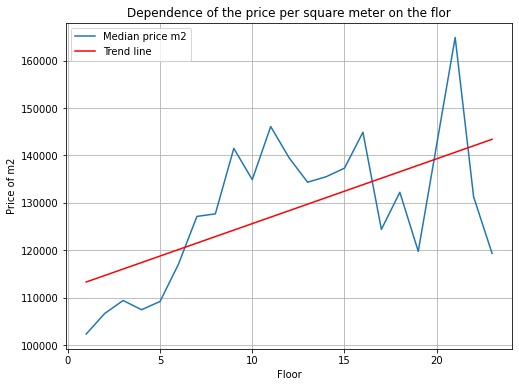

In [146]:
print(spb_centr['floor'].corr(spb_centr['price_per_square_meter']))

pivot_table_spb_floor = spb_centr.pivot_table(index = 'floor', 
                                              values = 'price_per_square_meter', 
                                              aggfunc = ['mean', 'count', 'median']
                                              ).reset_index()

pivot_table_spb_floor.columns = ['floor','mean', 'count', 'median']
x = pivot_table_spb_floor['floor']
y = pivot_table_spb_floor['median']

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('Dependence of the price per square meter on the flor')
plt.ylabel('Price of m2')
plt.xlabel('Floor')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Median price m2', 'Trend line'])
plt.show()

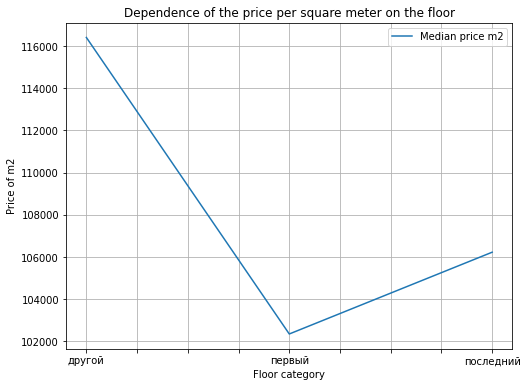

In [147]:
pivot_table_spb_floor_category = spb_centr.pivot_table(index = 'floor_category', 
                                                       values = 'price_per_square_meter', 
                                                       aggfunc = ['mean', 'count', 'median']
                                                       )

pivot_table_spb_floor_category.columns = ['mean', 'count', 'median']

pivot_table_spb_floor_category.plot(y = 'median', figsize=(8, 6))
plt.title('Dependence of the price per square meter on the floor')
plt.ylabel('Price of m2')
plt.xlabel('Floor category')
plt.legend(['Median price m2'])
plt.grid(True)

Conclusion: We can see a similar trend of increasing the price per square meter with an increase in the floor of the apartment, but at the same time a clearly negative effect of the extreme floors on the price per square meter, this trend is preserved.

#### Additionally, let's study the dependence of the price per square meter of the central part of St. Petersburg on the total number of floors in the building.

0.3144744433161773


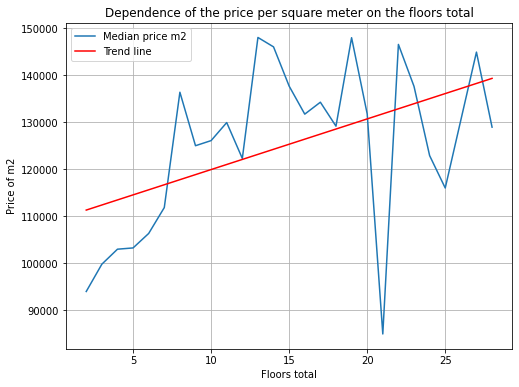

In [148]:
print(spb_centr['floors_total'].corr(spb_centr['price_per_square_meter']))

pivot_table_spb_floors_total = spb_centr.pivot_table(index = 'floors_total', 
                                                     values = 'price_per_square_meter', 
                                                     aggfunc = ['mean', 'count', 'median']
                                                     ).reset_index()

pivot_table_spb_floors_total.columns = ['floors_total','mean', 'count', 'median']
x = pivot_table_spb_floors_total['floors_total']
y = pivot_table_spb_floors_total['median']

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('Dependence of the price per square meter on the floors total')
plt.ylabel('Price of m2')
plt.xlabel('Floors total')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Median price m2', 'Trend line'])
plt.show()

Conclusion: The trend of a sharp increase in the price per square meter with an increase in the total number of floors in the building and a sharp decrease in the growth rates of prices in buildings with more than 10 floors is preserved.

#### Let's study the dependence of the price per square meter of the central part of St. Petersburg on the ceiling height.

-0.051867271289070656


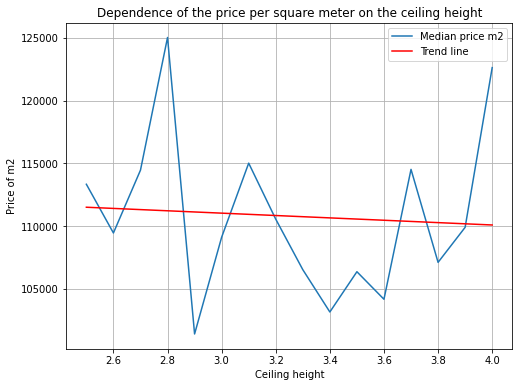

In [149]:
print(spb_centr['ceiling_height'].corr(spb_centr['price_per_square_meter']))

pivot_table_spb_c_h = spb_centr.pivot_table(index = 'ceiling_height', 
                                            values = 'price_per_square_meter', 
                                            aggfunc = ['mean', 'count', 'median']
                                            ).reset_index()

pivot_table_spb_c_h.columns = ['ceiling_height','mean', 'count', 'median']
x = pivot_table_spb_c_h['ceiling_height']
y = pivot_table_spb_c_h['median']

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('Dependence of the price per square meter on the ceiling height')
plt.ylabel('Price of m2')
plt.xlabel('Ceiling height')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Median price m2', 'Trend line'])
plt.show()

Conclusion: we can see that with an increase in ceiling height, the price per square meter increases.

#### Let's study the dependence of the price per square meter in the central part of St. Petersburg on the distance to the city center.

0.01668975310471743


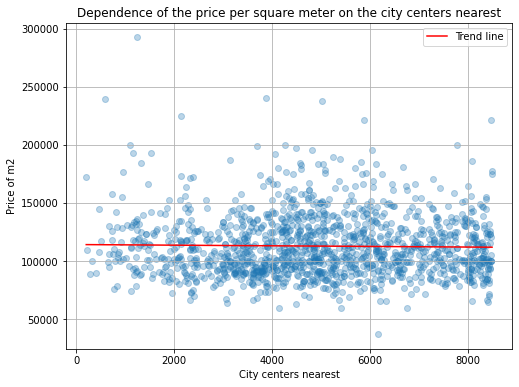

In [150]:
print(spb_centr['cityCenters_nearest'].corr(spb_centr['price_per_square_meter']))

pivot_table_spb_c_c = spb_centr.pivot_table(index = 'cityCenters_nearest', 
                                            values = 'price_per_square_meter', 
                                            aggfunc = ['mean', 'count', 'median']
                                            ).reset_index()

pivot_table_spb_c_c.columns = ['cityCenters_nearest','mean', 'count', 'median']
x = pivot_table_spb_c_c['cityCenters_nearest']
y = pivot_table_spb_c_c['median']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.3)
plt.title('Dependence of the price per square meter on the city centers nearest')
plt.ylabel('Price of m2')
plt.xlabel('City centers nearest')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Trend line'])
plt.show()

#### Additionally, let's study the dependence of the price per square meter on the distance to the nearest airport.

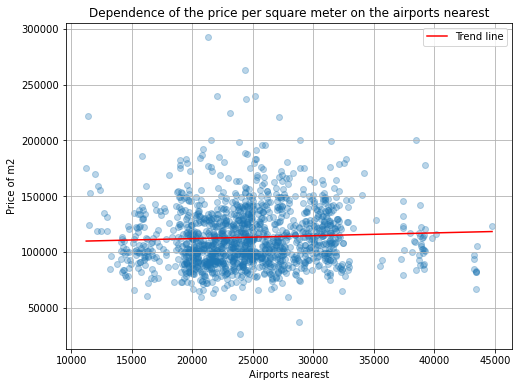

In [151]:
pivot_table_spb_a_c = spb_centr.pivot_table(index = 'airports_nearest', 
                                            values = 'price_per_square_meter', 
                                            aggfunc = ['mean', 'count', 'median']
                                            ).reset_index()

pivot_table_spb_a_c.columns = ['airports_nearest','mean', 'count', 'median']
x = pivot_table_spb_a_c['airports_nearest']
y = pivot_table_spb_a_c['median']

plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.3)
plt.title('Dependence of the price per square meter on the airports nearest')
plt.ylabel('Price of m2')
plt.xlabel('Airports nearest')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Trend line'])
plt.show()

Conclusion: as we can see, the dependence is very weak from the distance to the city center and to the airport, but with an increase in the distance from the city center, the price per square meter decreases and with an increase in the distance from the airport, the price per square meter increases.

#### Let's study the dependence of the price per square meter in the central part of St. Petersburg on the date of placement.

Let's study the dependence of the price per square meter on the day of the week of the announcement placement.

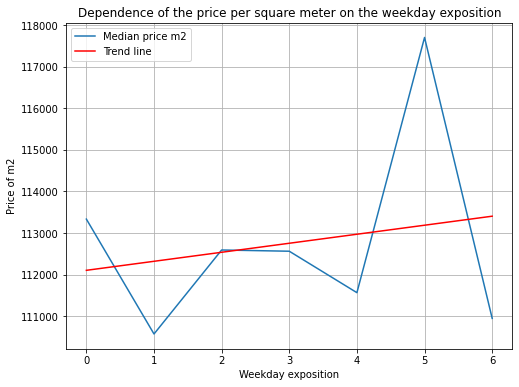

In [152]:
pivot_table_spb_weekday_exposition = spb_centr.pivot_table(index = 'weekday_exposition', 
                                                           values = 'price_per_square_meter', 
                                                           aggfunc = ['mean', 'count', 'median']
                                                           ).reset_index()

pivot_table_spb_weekday_exposition.columns = ['weekday_exposition','mean', 'count', 'median']
x = pivot_table_spb_weekday_exposition['weekday_exposition']
y = pivot_table_spb_weekday_exposition['median']

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('Dependence of the price per square meter on the weekday exposition')
plt.ylabel('Price of m2')
plt.xlabel('Weekday exposition')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Median price m2', 'Trend line'])
plt.show()

Let's study the dependence of the price per square meter on the month of the announcement placement.

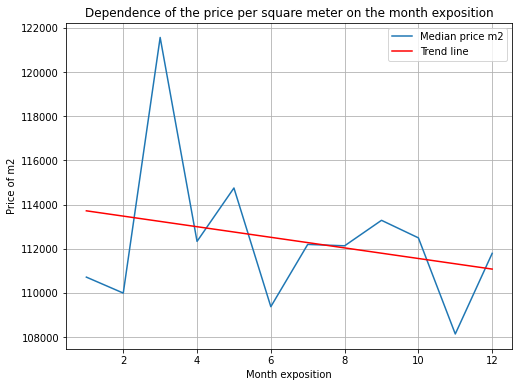

In [153]:
pivot_table_spb_month_exposition = spb_centr.pivot_table(index = 'month_exposition', 
                                                         values = 'price_per_square_meter', 
                                                         aggfunc = ['mean', 'count', 'median']
                                                         ).reset_index()

pivot_table_spb_month_exposition.columns = ['month_exposition','mean', 'count', 'median']
x = pivot_table_spb_month_exposition['month_exposition']
y = pivot_table_spb_month_exposition['median']

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('Dependence of the price per square meter on the month exposition')
plt.ylabel('Price of m2')
plt.xlabel('Month exposition')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Median price m2', 'Trend line'])
plt.show()

Let's study the dependence of the price per square meter on the year of the announcement placement.

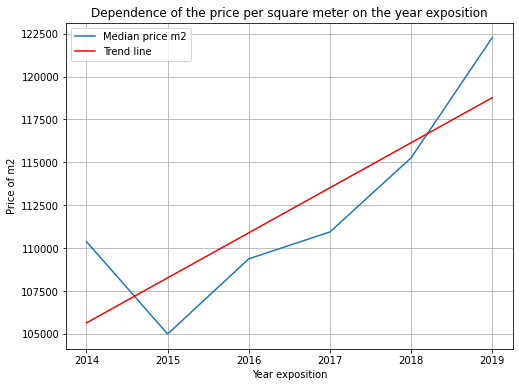

In [154]:
pivot_table_spb_year_exposition = spb_centr.pivot_table(index = 'year_exposition', 
                                                        values = 'price_per_square_meter', 
                                                        aggfunc = ['mean', 'count', 'median']
                                                        ).reset_index()

pivot_table_spb_year_exposition.columns = ['year_exposition','mean', 'count', 'median']
x = pivot_table_spb_year_exposition['year_exposition']
y = pivot_table_spb_year_exposition['median']

plt.figure(figsize=(8, 6))
plt.plot(x, y)
plt.title('Dependence of the price per square meter on the year exposition')
plt.ylabel('Price of m2')
plt.xlabel('Year exposition')
plt.grid(True)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),'r')
plt.legend(['Median price m2', 'Trend line'])
plt.show()

Conclusion:

From the graph of the dependence of the price per square meter on the day of the week of the ad placement, we can see a jumpy spread from day to day. The picture has changed compared to the sample that included ads from the Leningrad region, the peak of the highest price per square meter falls on Saturday, and the minimum on Tuesday and Sunday, while the trend of decreasing the price per square meter towards the end of the week is not preserved. 

From the graph of the dependence of the price per square meter on the month of the advertisement placement, we can see the preservation of seasonality of sales and now orient ourselves to the purchase of an apartment with a good discount in February, June and November, while the highest price of apartments will be in April, May and September. The trend of decreasing the price per square meter towards the end of the year is preserved.

From the graph of the dependence of the price per square meter on the year of placement of the advertisement, we can see a similar pattern of change in the price per square meter from year to year, with the minimum price per square meter in 2015 and an active growth to the maximum value fixed in 2019.

## 5. Overall conclusion.

A dataframe with sufficient amounts of missing and anomalous values was proposed for the study. Some of these were later filled with mean and median values based on the data categorization. Missing data that was supposed to be formed based on cartography was filled by specifying coordinates through a geocoder and further calculating distances with subsequent filling of the missing data. During the preliminary data processing, 0.8% of the data from the initial volume was removed due to the impossibility of processing and preparing it for analysis. For convenience of analysis and presentation, the data was transformed and rounded depending on the purpose. Subsequently, during data analysis, the boundaries of normal values and outliers were determined and calculated based on the range diagrams, with subsequent removal of outliers and anomalies from the sample.

Conducting an investigation of the archive of advertisements for the sale of apartments in St. Petersburg and the Leningrad region, the graphs and data show the following dependence for both the general sample and the separately considered central part of St. Petersburg.

Apartments are usually sold within a period of 39-225 days, and if an apartment is sold within 39-100 days, then you are either a good analyst, have a light hand, or you are lucky, as most apartments are sold within 100-225 days.

According to the dependence of the square meter on other parameters and characteristics of the apartment from the research, it is seen that the price of the square meter is related to the total price, total area, number of rooms, ceiling height, total number of floors of the building, current floor, living area, kitchen area and infrastructure - distance to the city center and airport, as well as from infrastructure - the presence of parks and lakes. The connection from the placement date has practical application only by the month of placement, since only in this representation the seasonality of the market is visible, the year of sale only shows how the real estate market developed after the 2014 crisis, the dependence on the day of the week, in my opinion, is absent with the trend of decreasing prices towards the end of the week.

Зависимость цены квадратного метра от площадных показателей следующий:
* При увеличении общей цены квартиры, цена м2 снижается.
* В общем при увеличении площади кухни и жилой площади, цена м2 снижается.

The dependence of the price per square meter on the area indicators is as follows:
* When the total price of the apartment increases, the price per m2 decreases.
* In general, when the kitchen and living area increase, the price per m2 decreases.
* The dependence of the price per square meter on the ceiling height, number of rooms, floor of the apartment, and total number of floors of the building is as follows. In general, when the ceiling height increases, the price per m2 increases. When the number of rooms in the apartment decreases, the price per m2 increases. When the floor of the apartment increases, the price per m2 increases, but there is a significant negative factor for the first and last floors. The extreme floors are negative factors, and the degree of influence is not the same, the last floors are much more expensive than the first.
* The total number of floors of the building in which the apartment is sold also affects the price per m2. When the total number of floors of the building increases, the price per m2 increases.

The dependence of the price per square meter on the distance from the city center is as follows:
* As the distance from the city center increases, the price per m2 decreases.
* As the distance to the nearest airport increases, the price per m2 decreases.

According to the number of ads in the dataframe, St. Petersburg leads with 11082 against Vyborg with only 168 ads. At the same time, the average price per square meter in St. Petersburg is 104394, and the median is 101058. In Vyborg, the average price per square meter is 57537, and the median is 57404.

Despite its asymmetrical structure, the central part of St. Petersburg covers an area of 8 km radius. At the same time, the trends of the dependence of the price per square meter on the considered parameters are generally preserved, and for some indicators they are more pronounced compared to the initial sample.

Based on the analysis of the dataframe, the average portrait of the apartment offered for sale is as follows: on average, a two-room apartment in the "Sleeping District" of St. Petersburg with a ceiling height of 2.7 m, an area of 49 m2 is offered for sale for 4.35 million rubles.

According to the heat map, the following characteristics have the greatest influence on the price per square meter:

* Weak interaction, correlation coefficient up to 0.3, from the considered indicators: total area, living area, kitchen area, apartment floor, ceiling height, number of rooms, and date of posting the ad.
* Moderate interaction, correlation coefficient up to 0.3 - 0.5, from the considered indicators: total number of floors in the house where the apartment is located and the distance to the nearest airport.
* Significant interaction, correlation coefficient up to 0.5 - 0.7, from the considered indicators: distance to the city center.

Based on this, the following recommendations can be made:

* If the sale is dragging on for more than 100 days and you don't know what to do, you may be able to speed up the sale by re-listing the apartment during a period of low sale price or offering a discount, as other parameters are difficult to change.
* Pay attention to the floor of the apartment's location; a negative effect has been identified with positive trends for apartments located on the extreme floors, especially on the first floor.
* When buying large and multi-room apartments, boldly ask for a discount for bulk purchase of rooms and square meters.
* Also, don't forget about the seasonality of the real estate market and choose the right period for placing the apartment for a particular transaction - a quick sale at a low price or a long sale at a higher price.
* The main factor influencing the price, surprisingly, is the distance to the city center, but this is a matter of wallet or taste. 
